### TCC 6 – individual - Tatiana Prado Santos Massoco

# Desenvolvimento de Modelo Preditivo de Risco ESG para Investimentos Sustentáveis

Fonte de daddos: https://www.kaggle.com/datasets/tunguz/environment-social-and-governance-data/data

## Objetivo do Projeto  
Desenvolver um modelo preditivo de risco ESG (Environmental, Social, Governance) para investimentos sustentáveis. O modelo visa identificar riscos associados a fatores ESG, auxiliando na tomada de decisões alinhadas à sustentabilidade.  

---

## Ferramentas Necessárias  
- **Linguagem de Programação:** Python.  
- **Bibliotecas:** pandas, numpy, seaborn, matplotlib, scikit-learn.  
- **Ambiente:** Jupyter Notebook, Anaconda.  
- **Controle de Versão:** Git e GitHub.  
- **Deploy:** Flask, Docker.  
- **Monitoramento:** Prometheus e Grafana.  

---

## EDA (Exploratory Data Analysis) - Análise Exploratória de Dados

In [19]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Configurar gráficos para visualização dentro do notebook
%matplotlib inline
sns.set(style="whitegrid")

# Caminho para o arquivo de dados limpo
caminho_dados = "../data/ESGData_clean_final.csv"

# Carregar o dataset
dados = pd.read_csv(caminho_dados)

# Exibir as primeiras linhas do dataset para revisão inicial
dados.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,1970_log,1980_log,1990_log,2000_log,2010_log
0,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,6.277652,5.261868,6.385551,8.190277,20.363941,1.873761,3.334040,2.207838,2.426250,2.394812
1,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,0.086177,0.076670,0.085885,0.047916,20.363941,0.117221,0.036283,0.051367,0.030845,0.051462
2,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,27.835643,27.826564,27.845522,27.847925,27.866972,27.866171,...,36.624759,36.610850,17.396336,18.176999,20.363941,3.369722,3.387835,3.482304,3.619277,3.622365
3,Arab World,ARB,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,5.432857,5.482909,5.119066,4.735027,4.560470,2.107454,1.979585,2.415767,2.134617,1.820926
4,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.660638,0.724944,0.850567,0.969476,1.135271,1.248257,...,4.933420,4.712845,17.396336,18.176999,20.363941,1.026961,1.406725,1.371434,1.549034,1.728224


In [2]:
# Exibir informações gerais do dataset
dados.info()

# Exibir estatísticas descritivas para as colunas numéricas
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    5626 non-null   object 
 1   Country Code    5626 non-null   object 
 2   Indicator Name  5626 non-null   object 
 3   Indicator Code  5626 non-null   object 
 4   1961            5626 non-null   float64
 5   1962            5626 non-null   float64
 6   1963            5626 non-null   float64
 7   1964            5626 non-null   float64
 8   1965            5626 non-null   float64
 9   1966            5626 non-null   float64
 10  1967            5626 non-null   float64
 11  1968            5626 non-null   float64
 12  1969            5626 non-null   float64
 13  1970            5626 non-null   float64
 14  1971            5626 non-null   float64
 15  1972            5626 non-null   float64
 16  1973            5626 non-null   float64
 17  1974            5626 non-null   f

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2015,2016,2017,2018,2019,1970_log,1980_log,1990_log,2000_log,2010_log
count,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,...,5.626000e+03,5.626000e+03,5.626000e+03,5.626000e+03,5.626000e+03,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000
mean,40.859079,42.151734,43.544570,44.624130,45.576310,46.147120,47.019748,48.018346,49.350241,42.348561,...,3.009122e+03,3.487179e+03,3.554149e+03,3.823583e+03,3.520145e+03,2.259386,2.654036,2.795907,2.817323,2.916583
std,277.539368,282.945827,290.845655,300.137197,305.034299,308.189647,312.799087,327.262310,341.816739,359.545768,...,5.492168e+04,6.502821e+04,6.661469e+04,7.250746e+04,6.627365e+04,1.234305,1.603246,1.840223,1.875583,1.885532
min,-27.270000,-19.685042,-17.080467,-19.719407,-17.715074,-17.760415,-15.863752,-16.072351,-15.405856,-14.970166,...,-5.813466e+02,-1.019039e+01,-6.799428e+00,-6.356339e+00,-8.100000e+00,-1.425736,-4.100609,-2.036882,-3.526754,-2.575505
25%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,6.631343,...,4.960000e+00,5.648155e+00,8.179701e+00,8.483216e+00,2.036394e+01,2.043889,1.653203,1.248221,1.273871,1.380161
50%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,7.188000,...,2.544308e+01,2.457550e+01,1.739634e+01,1.817700e+01,2.036394e+01,2.107454,2.571328,2.968362,2.865028,3.019449
75%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,8.373408,...,6.523484e+01,6.246872e+01,4.396814e+01,4.256721e+01,2.036394e+01,2.237874,3.660753,4.152592,4.243773,4.267557
max,11252.096695,11366.058214,11429.699063,11463.246177,11485.939813,11497.286630,11490.873212,11496.793291,11974.192593,12106.152944,...,1.864186e+06,2.128683e+06,2.162897e+06,2.294881e+06,2.144825e+06,9.401552,12.722951,13.201904,13.620911,13.964706


### Análise Inicial do Dataset

**1.  Análise das Colunas e Tipos de Dados**

As colunas numéricas e os indicadores estão bem estruturados, o que permitirá trabalhar diretamente com as estatísticas descritivas e as correlações.

**2.  Estrutura do Dataset**

- O dataset tem **5626 entradas** e **68 colunas**.
- As colunas numéricas foram corretamente preenchidas, sem valores ausentes.

**3.  Resumo Estatístico**

Os dados apresentam uma ampla gama de valores, com algumas colunas contendo valores negativos e outros muito altos. Isso pode indicar a necessidade de normalização em etapas futuras.

---

### Próximos Passos para o EDA

**1.  Explorar Distribuições**

- Criar gráficos de distribuição para as colunas principais (por exemplo, indicadores econômicos, ambientais e sociais).
- Avaliar a presença de valores discrepantes (outliers).

**2.  Analisar Correlações**

- Gerar uma matriz de correlação entre os indicadores para identificar relações significativas.

**3.  Explorar Tendências Temporais**

- Visualizar como os indicadores mudam ao longo do tempo para alguns países específicos.

**4.  Identificar Países Relevantes**

- Analisar quais países têm maior impacto em determinados indicadores ESG.

### Lista dos 33 Indicadores presentes na Base de Dados

- Adjusted savings: natural resources depletion (% of GNI)
- Adjusted savings: net forest depletion (% of GNI)
- Agricultural land (% of land area)
- Agriculture, forestry, and fishing, value added (% of GDP)
- CO2 emissions (metric tons per capita)
- Electricity production from coal sources (% of total)
- Energy imports, net (% of energy use)
- Energy use (kg of oil equivalent per capita)
- Fertility rate, total (births per woman)
- Food production index (2004-2006 = 100)
- Forest area (% of land area)
- Fossil fuel energy consumption (% of total)
- GDP growth (annual %)
- Individuals using the Internet (% of population)
- Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)
- Life expectancy at birth, total (years)
- Literacy rate, adult total (% of people ages 15 and above)
- Methane emissions (metric tons of CO2 equivalent per capita)
- Mortality rate, under-5 (per 1,000 live births)
- Nitrous oxide emissions (metric tons of CO2 equivalent per capita)
- Population ages 65 and above (% of total population)
- Population density (people per sq. km of land area)
- Prevalence of overweight (% of adults)
- Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
- School enrollment, primary (% gross)
- School enrollment, primary and secondary (gross), gender parity index (GPI)
- Unemployment, total (% of total labor force) (modeled ILO estimate)
- Access to electricity (% of population)
- Government expenditure on education, total (% of government expenditure)
- Hospital beds (per 1,000 people)
- Patent applications, residents
- Gini index (World Bank estimate)
- Income share held by lowest 20%

### Indicadores escolhidos por Pilar ESG

1. #### Pilar Ambiental (E - Environmental)

Indicadores que avaliam os impactos no meio ambiente e a sustentabilidade:

- CO2 emissions (metric tons per capita): Crucial para avaliar a contribuição de um país ou região para as mudanças climáticas.
- Methane emissions (metric tons of CO2 equivalent per capita): Impacto climático elevado.
- Nitrous oxide emissions (metric tons of CO2 equivalent per capita): Relacionado ao aquecimento global.
- Energy use (kg of oil equivalent per capita): Mede a eficiência energética.
- Fossil fuel energy consumption (% of total): Indica dependência de combustíveis fósseis.
- Electricity production from coal sources (% of total): Reflete a transição para fontes de energia mais limpas.
- Forest area (% of land area): Relacionado à preservação ambiental e capacidade de captura de carbono.
- Adjusted savings: natural resources depletion (% of GNI): Mede a exploração de recursos naturais em relação à economia.

**Por que priorizar?**

Esses indicadores refletem diretamente como as atividades econômicas e sociais afetam o meio ambiente e a sustentabilidade, fatores centrais no risco ESG ambiental.

2. #### Pilar Social (S - Social)

- Indicadores que avaliam impactos nas comunidades e na qualidade de vida:
- Life expectancy at birth, total (years): Medida de saúde e qualidade de vida.
- Literacy rate, adult total (% of people ages 15 and above): Nível educacional, essencial para o desenvolvimento social.
- School enrollment, primary and secondary (gross), gender parity index (GPI): Mede igualdade educacional entre gêneros.
- Prevalence of overweight (% of adults): Indicador de saúde pública.
- Unemployment, total (% of total labor force): Avalia o impacto econômico e social no emprego.
- Individuals using the Internet (% of population): Reflete o acesso à tecnologia e à inclusão digital.
- Access to electricity (% of population): Indicador básico de infraestrutura e qualidade de vida.

**Por que priorizar?**

Esses fatores estão ligados à qualidade de vida, desigualdade social e desenvolvimento humano, aspectos que impactam a percepção de risco social.

3. #### Pilar Governança (G - Governance)

- Indicadores que avaliam transparência, igualdade e eficiência no gerenciamento:
- Gini index (World Bank estimate): Mede desigualdade de renda.
- Government expenditure on education, total (% of government expenditure): Mostra comprometimento do governo com o desenvolvimento humano.
- Ratio of female to male labor force participation rate (%): Reflete igualdade de gênero no mercado de trabalho.
- Patent applications, residents: Mede inovação e competitividade.
- Income share held by lowest 20%: Avalia equidade econômica.

**Por que priorizar?**

Esses indicadores estão relacionados à estabilidade, transparência e equidade, todos aspectos críticos em análise de risco de governança.

---
Análise de Distribuições - Indicadores ESG
==========================================

**Objetivo**

O objetivo desta etapa é explorar a distribuição dos valores dos indicadores ESG selecionados, separados por pilar (Ambiental, Social e Governança). Essa análise ajudará a identificar padrões, outliers e tendências que podem orientar os próximos passos na modelagem dos dados.

**Etapas da Análise**

1. **Divisão dos Indicadores por Pilares**

   - Os indicadores foram divididos em três categorias (Ambiental, Social e Governança) com base na literatura e relevância para análise ESG.
   - Para cada pilar, os dados foram filtrados para trabalhar exclusivamente com os indicadores selecionados.

2. **Visualização de Distribuições**

   - Histogramas foram criados para observar como os valores de cada indicador estão distribuídos em anos específicos (1970, 1980, 1990, 2000 e 2010).
   - A visualização inclui curvas de densidade (KDE) sobrepostas aos histogramas, para melhor compreensão da forma dos dados.

3. **Identificação de Padrões e Outliers**

   - As análises ajudam a detectar:
     - Concentração de valores (média ou mediana).
     - Dispersão (amplitude de valores).
     - Outliers (valores distantes do padrão esperado).

4. **Preparação para Ajustes Futuros**

   - Com base nos resultados, será avaliada a necessidade de normalização ou transformação dos dados.

**Ordem dos Códigos no EDA**

1. **Passo 1**: Divisão dos Indicadores por Pilares.
2. **Passo 2**: Escolher um Indicador para Análise.
3. **Passo 3**: Gerar Gráficos de Distribuição.

---

### Por que os anos 1960 e 2020 ficaram de fora?

Os anos **1960** e **2020** foram removidos deliberadamente por dois motivos principais:

#### Valores Ausentes Excessivos:

- Durante a limpeza do dataset, foi identificado que as colunas desses anos tinham uma grande quantidade de valores ausentes (mais de 90%).
- Decidi remover essas colunas para evitar que dados insuficientes distorçam análises e visualizações.

#### Impacto no EDA:

- A inclusão de colunas com muitos valores ausentes poderia comprometer a visualização e análise, já que os gráficos seriam menos representativos e poderiam confundir em vez de informar.

### Passo 1: Divisão dos Indicadores por Pilares.

In [5]:
# Criar listas com os indicadores selecionados para cada pilar
ambiental = [
    "CO2 emissions (metric tons per capita)",
    "Methane emissions (metric tons of CO2 equivalent per capita)",
    "Nitrous oxide emissions (metric tons of CO2 equivalent per capita)",
    "Energy use (kg of oil equivalent per capita)",
    "Fossil fuel energy consumption (% of total)",
    "Electricity production from coal sources (% of total)",
    "Forest area (% of land area)",
    "Adjusted savings: natural resources depletion (% of GNI)"
]

social = [
    "Life expectancy at birth, total (years)",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "School enrollment, primary and secondary (gross), gender parity index (GPI)",
    "Prevalence of overweight (% of adults)",
    "Unemployment, total (% of total labor force)",
    "Individuals using the Internet (% of population)",
    "Access to electricity (% of population)"
]

governanca = [
    "Gini index (World Bank estimate)",
    "Government expenditure on education, total (% of government expenditure)",
    "Ratio of female to male labor force participation rate (%)",
    "Patent applications, residents",
    "Income share held by lowest 20%"
]

# Filtrar os dados por indicadores
dados_ambiental = dados[dados["Indicator Name"].isin(ambiental)]
dados_social = dados[dados["Indicator Name"].isin(social)]
dados_governanca = dados[dados["Indicator Name"].isin(governanca)]

### Passo 2: Escolher um Indicador para Análise.

In [6]:
# Escolha do indicador para análise: CO2 emissions per capita
indicador_escolhido = "CO2 emissions (metric tons per capita)"

# Filtrar o dataset apenas para o indicador escolhido
dados_filtrados = dados[dados["Indicator Name"] == indicador_escolhido]

### Passo 3: Gerar Gráficos de Distribuição.

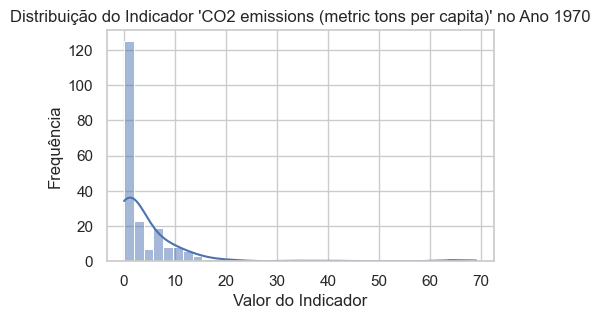

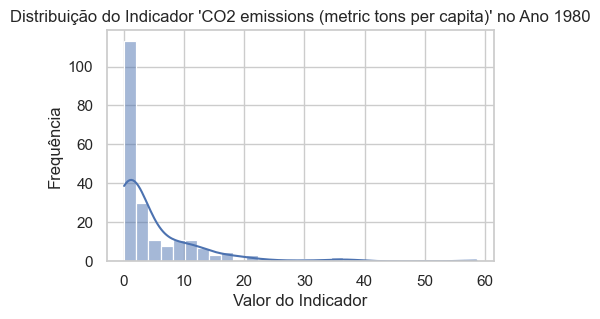

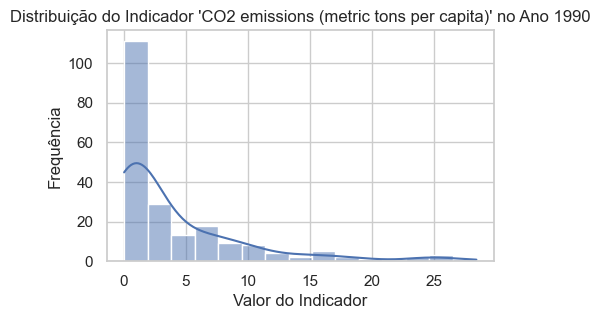

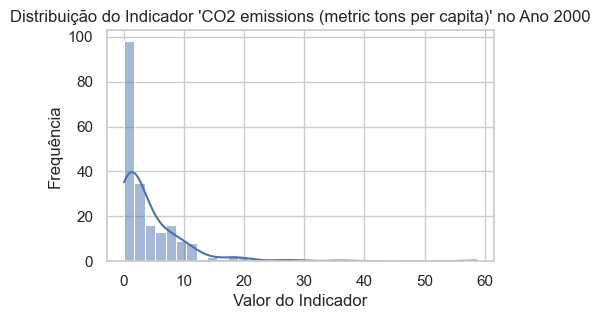

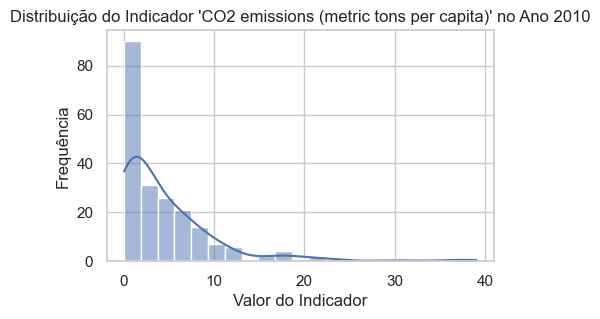

In [8]:
# Gerar gráficos de distribuição para os anos específicos
anos_para_analisar = ["1970", "1980", "1990", "2000", "2010"]

for ano in anos_para_analisar:
    if ano in dados_filtrados.columns:
        plt.figure(figsize=(5, 3))  # Ajuste do tamanho para melhor visualização
        sns.histplot(dados_filtrados[ano].dropna(), kde=True)
        plt.title(f"Distribuição do Indicador '{indicador_escolhido}' no Ano {ano}")
        plt.xlabel("Valor do Indicador")
        plt.ylabel("Frequência")
        plt.show()

### Observações dos Outputs

**Forma das Distribuições:**

- Para todos os anos (1970, 1980, 1990, 2000 e 2010), a distribuição é enviesada à direita, indicando que a maioria dos países possui emissões de CO2 por habitante relativamente baixas, enquanto poucos apresentam valores extremamente altos (outliers).
- Isso reflete a discrepância entre países desenvolvidos e em desenvolvimento no que diz respeito às emissões de carbono.

**Tendências:**

- A dispersão parece aumentar com o passar dos anos, sugerindo que alguns países aumentaram consideravelmente suas emissões.
- É importante explorar quais países apresentam esses outliers e os fatores associados.

**Outliers:**

- A presença de valores extremos pode exigir tratamento especial, como normalização ou exclusão dependendo do impacto na análise.

**Dados Consistentes:**

- Não há lacunas ou inconsistências evidentes nos dados plotados para os anos analisados.


Estratégia para Tornar o Processo Mais Eficiente
===============================================

**Automatizar o Processo**

- Em vez de repetir manualmente os passos 2 e 3 para cada indicador, cria-se um loop para gerar gráficos automaticamente para todos os indicadores de cada pilar (Ambiental, Social, e Governança).

**Foco Inicial**

- Analisar um ou dois indicadores de cada pilar, especialmente aqueles que se mostram mais relevantes. Isso permitirá o desenvolvimento de insights iniciais e o refinamento da abordagem a ser tomada antes de processar os 20 indicadores.

**Agrupamento de Indicadores**

- Se os indicadores de um pilar forem semelhantes em comportamento ou impacto, pode-se criar gráficos combinados para analisar tendências gerais.

**Código para Automatizar a Análise de Todos os Indicadores**

- Um código que gera gráficos para todos os indicadores de cada pilar de forma eficiente e documentada.

---

Benefícios do Código Automatizado
=================================

1. **Economia de Tempo**

   - Analisa todos os indicadores de forma automatizada, sem precisar repetir os comandos.

2. **Documentação Completa**

   - Garante que todos os indicadores sejam analisados de maneira consistente.

3. **Comparações Facilitadas**

   - Ajuda a identificar rapidamente os indicadores que requerem atenção especial.

**Próximos Passos**
1. Executar a análise automatizada.
2. Revisar os gráficos para identificar padrões gerais.
3. Priorizar indicadores que apresentem distribuições incomuns ou desafios específicos para análise detalhada.

## Passo 1: Geração dos Gráficos

Analisando indicadores do pilar: Ambiental


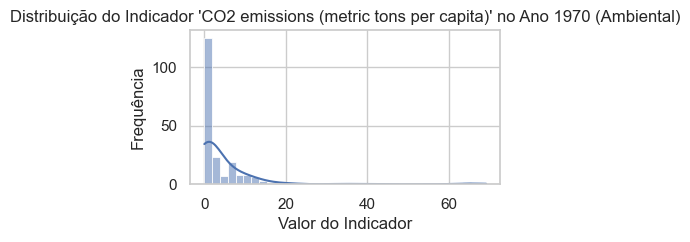

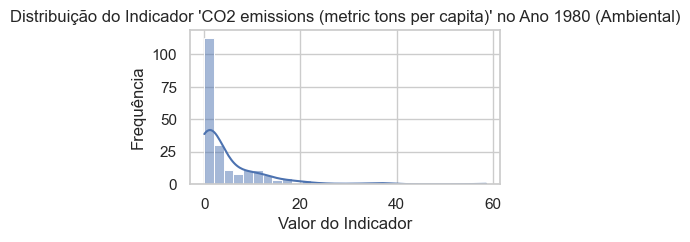

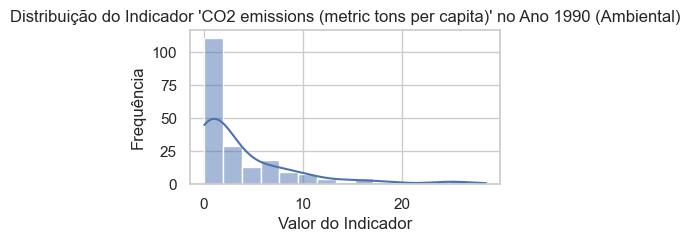

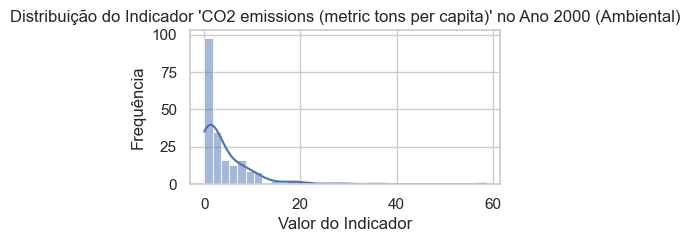

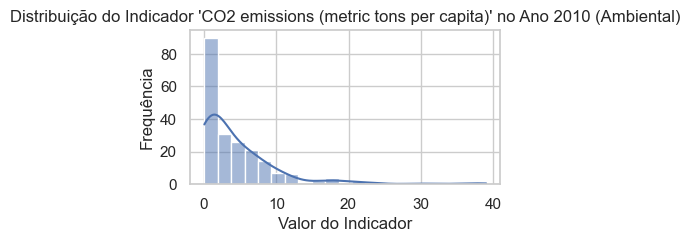

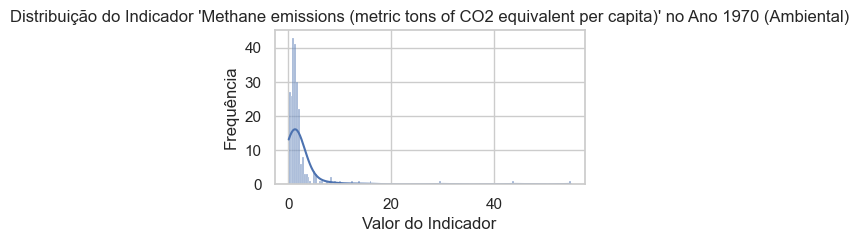

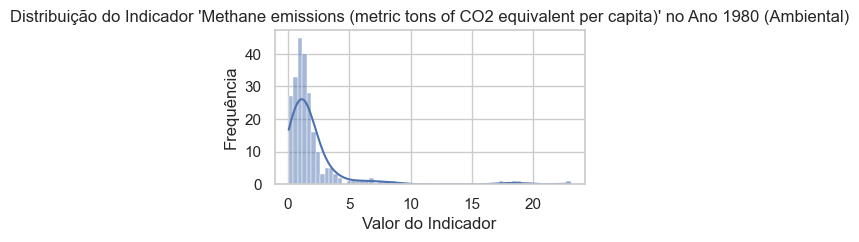

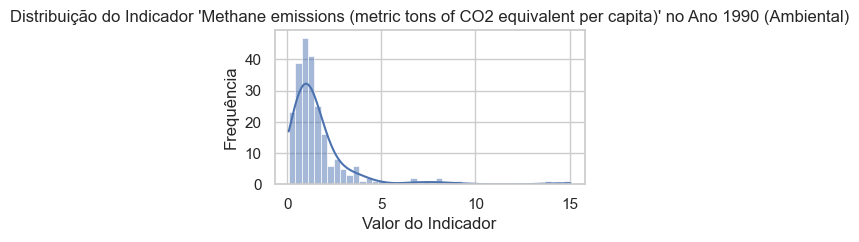

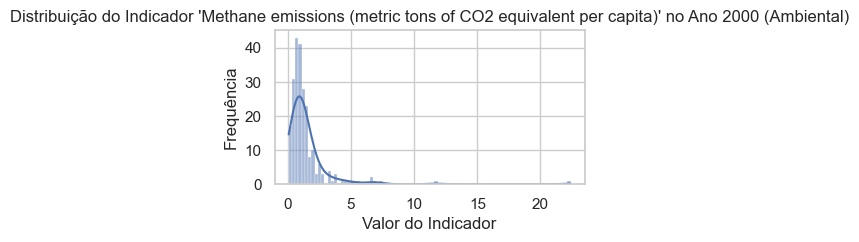

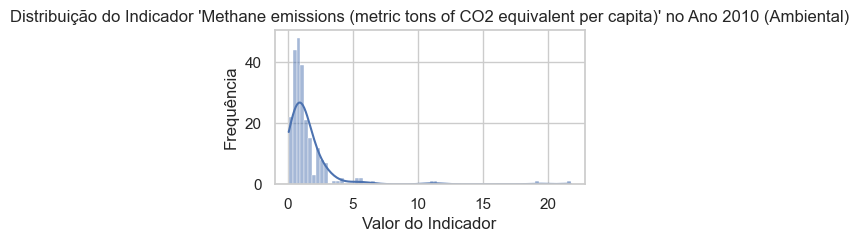

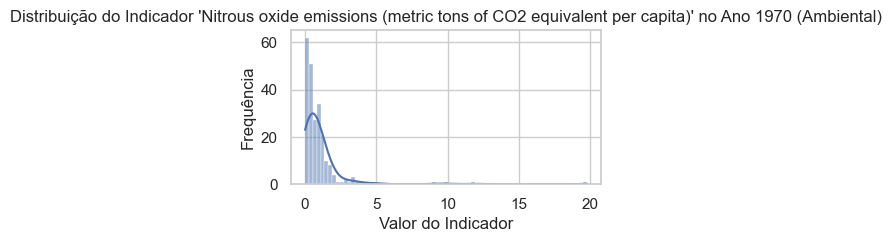

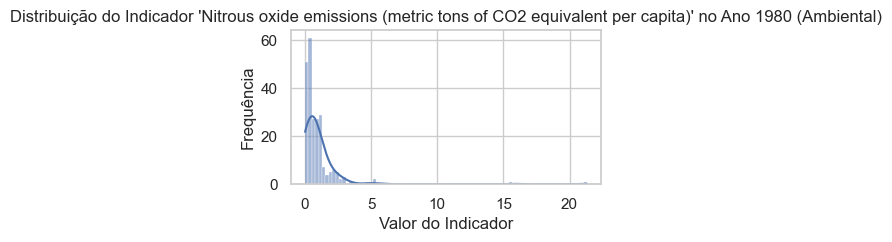

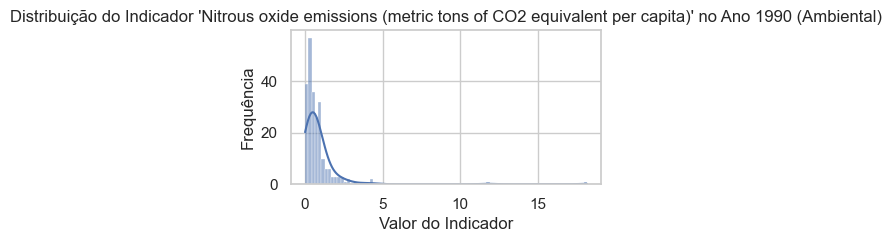

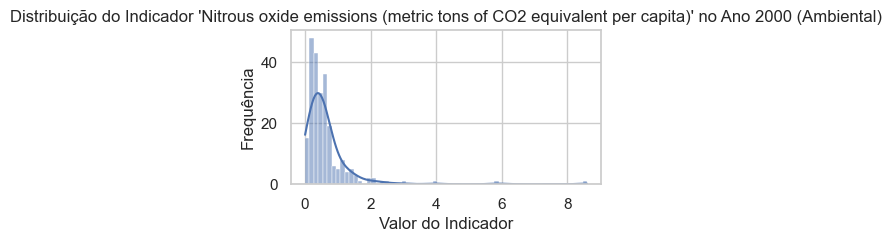

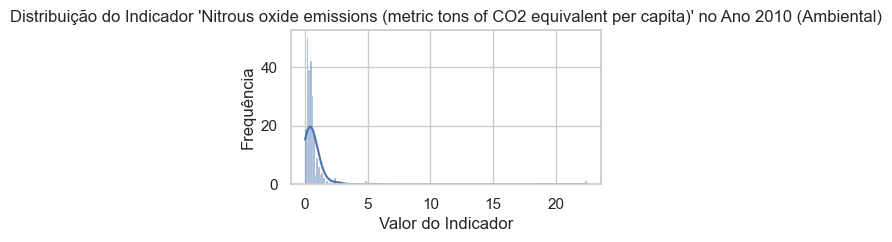

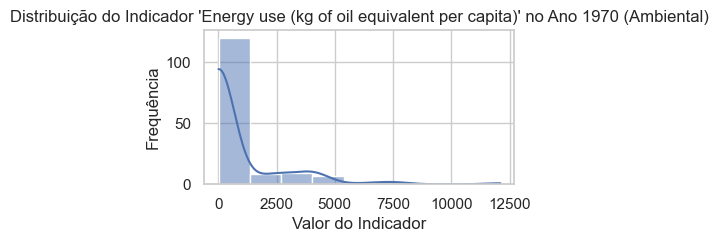

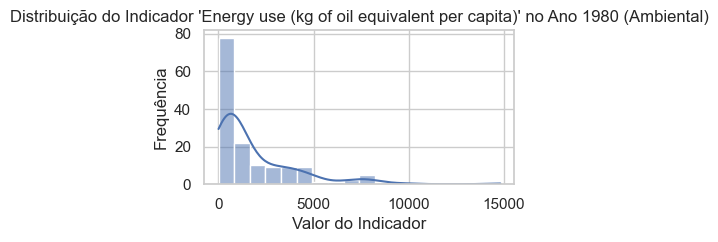

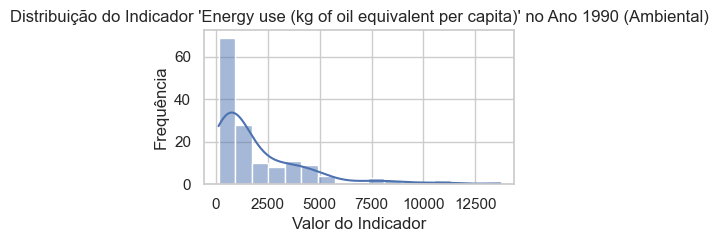

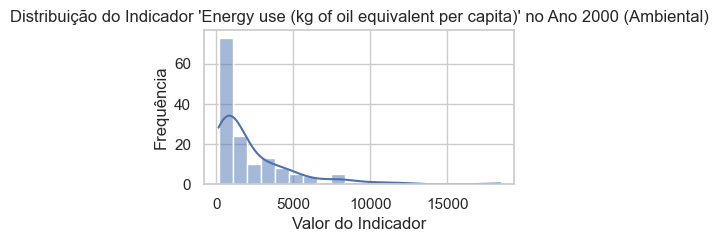

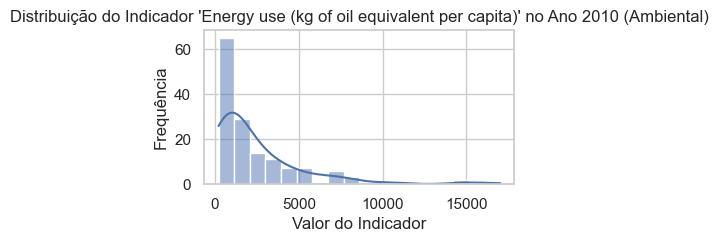

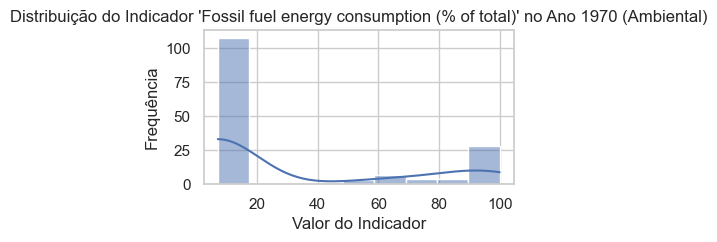

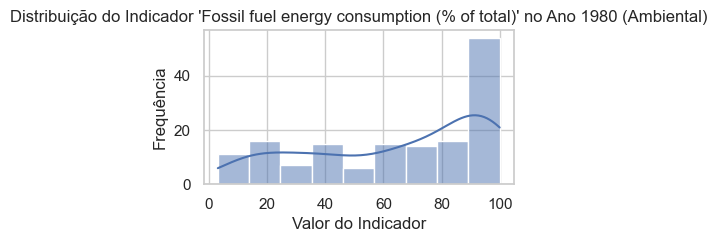

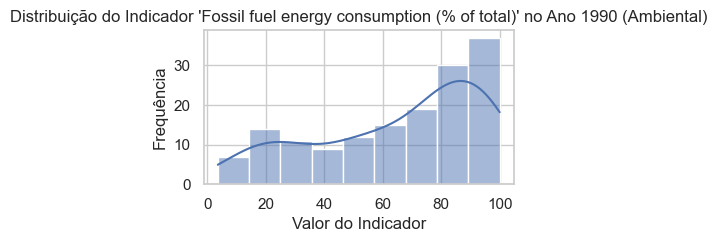

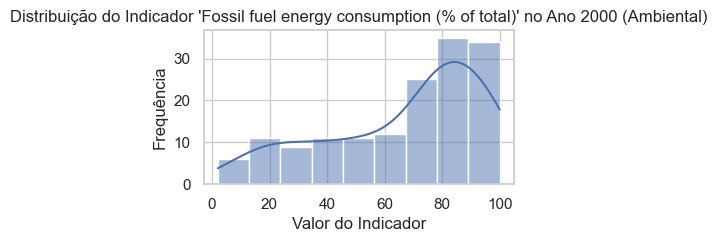

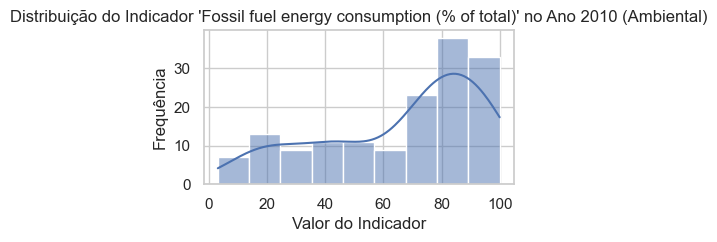

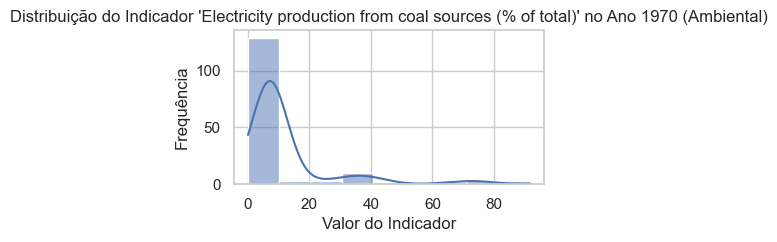

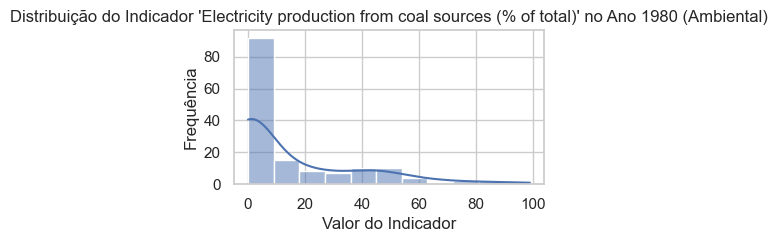

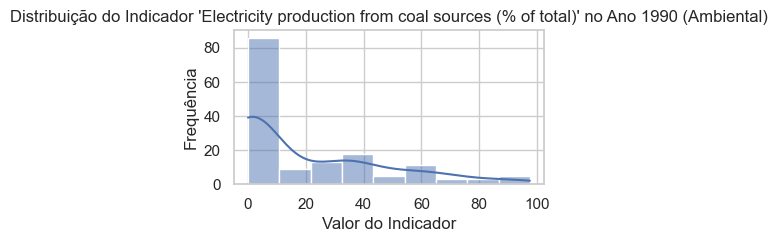

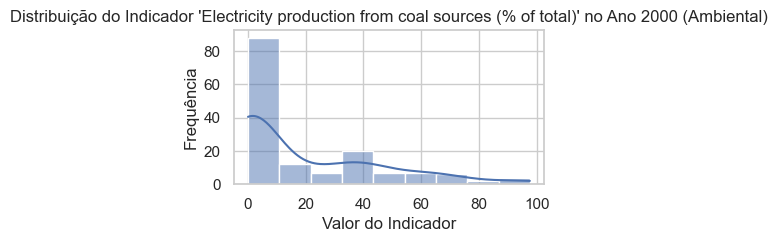

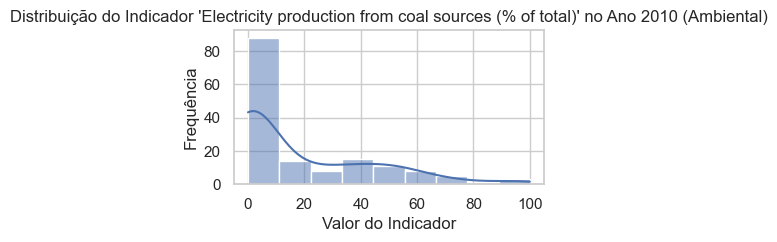

Indicador 'Forest area (% of land area)' no ano 1970 (Ambiental) possui dados constantes ou insuficientes para KDE.
Indicador 'Forest area (% of land area)' no ano 1980 (Ambiental) possui dados constantes ou insuficientes para KDE.


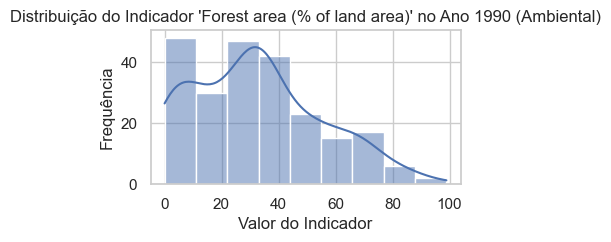

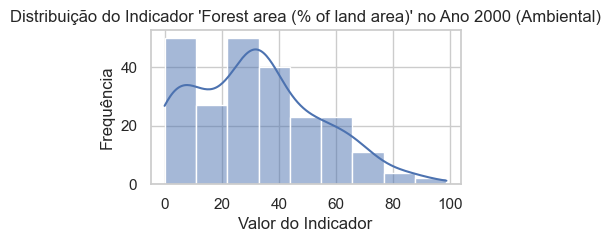

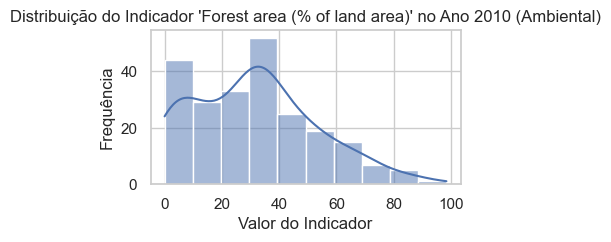

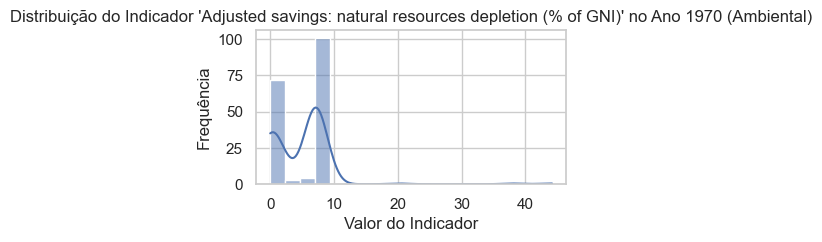

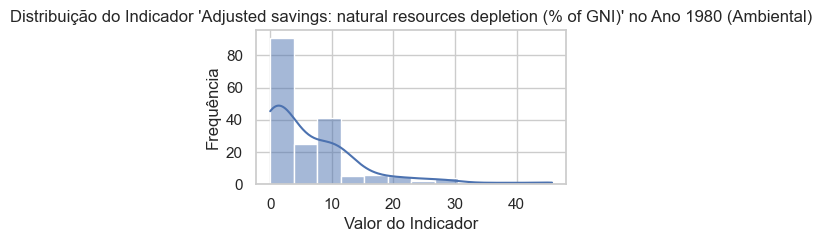

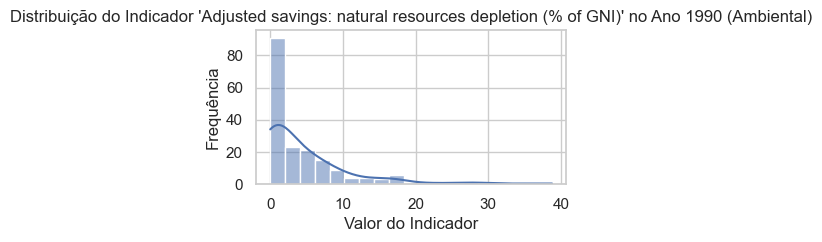

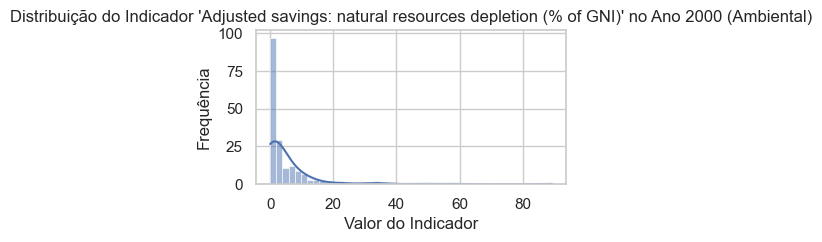

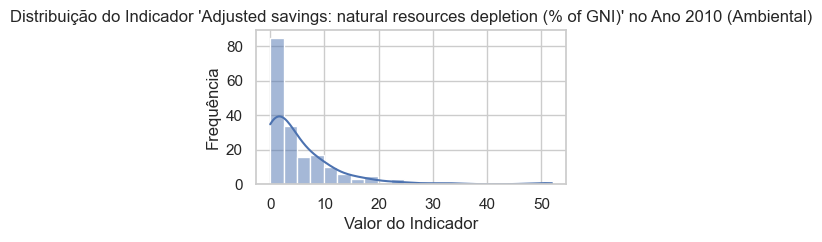

Analisando indicadores do pilar: Social


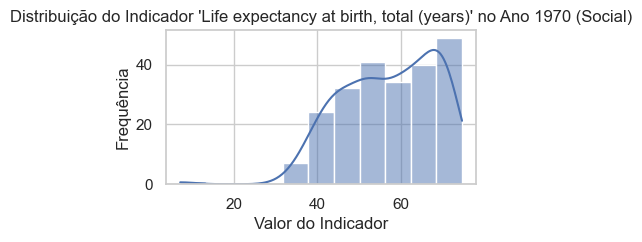

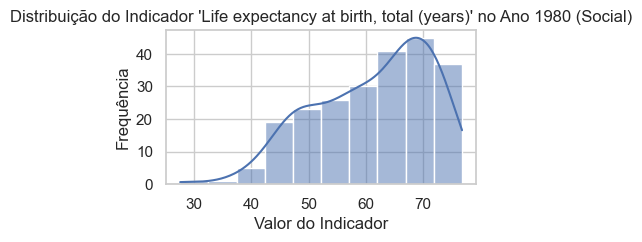

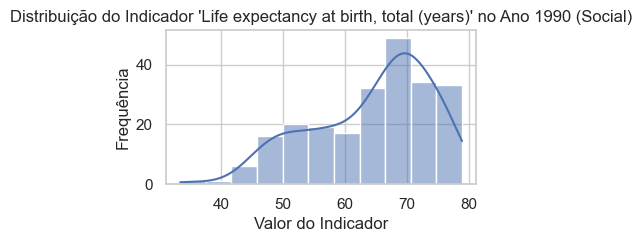

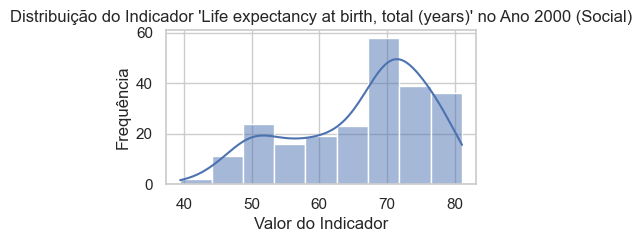

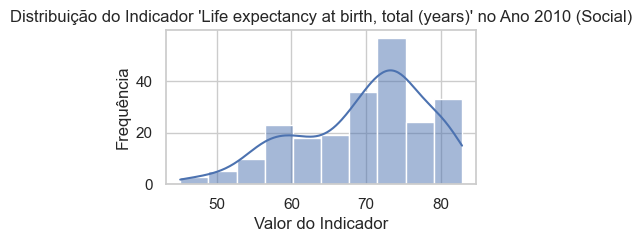

Indicador 'Literacy rate, adult total (% of people ages 15 and above)' no ano 1970 (Social) possui dados constantes ou insuficientes para KDE.


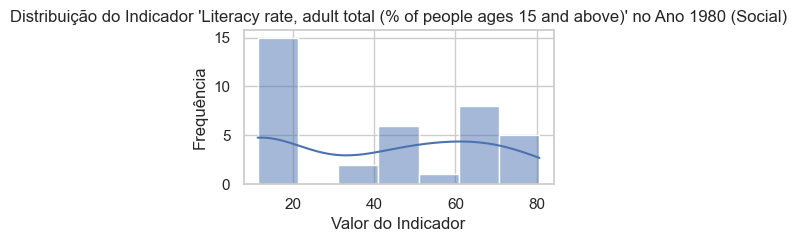

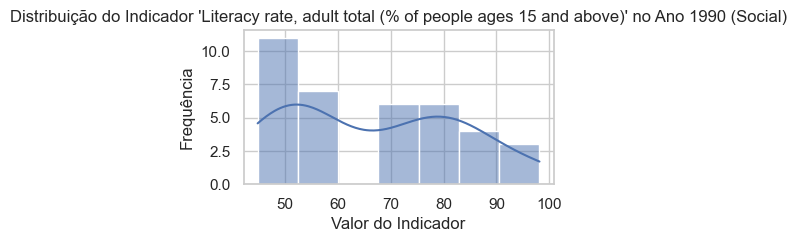

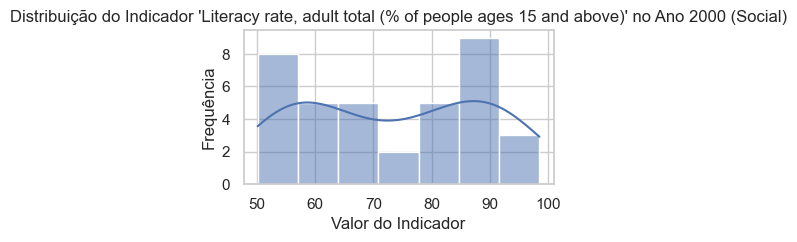

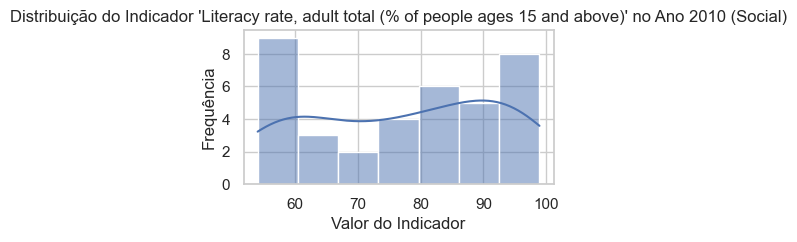

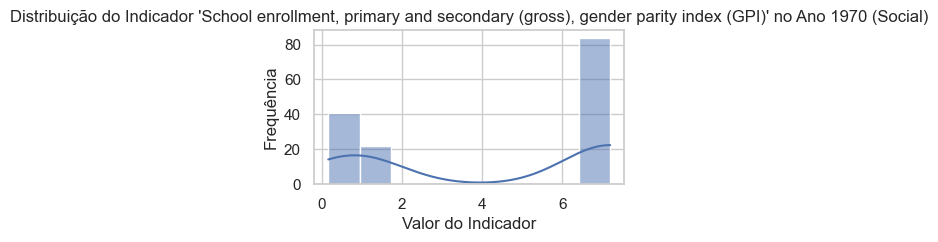

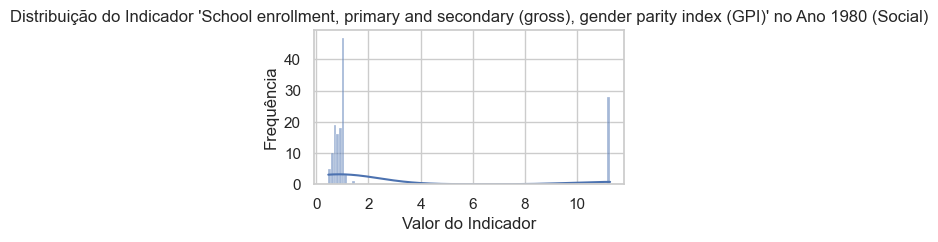

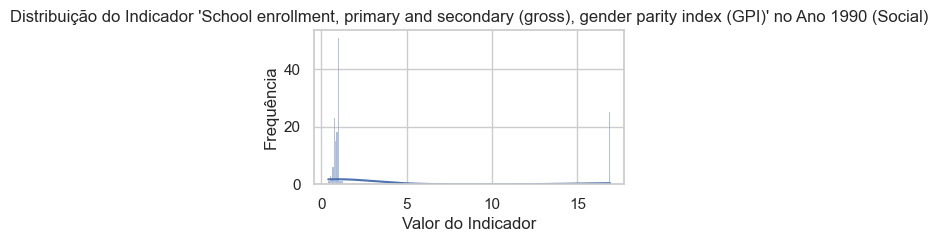

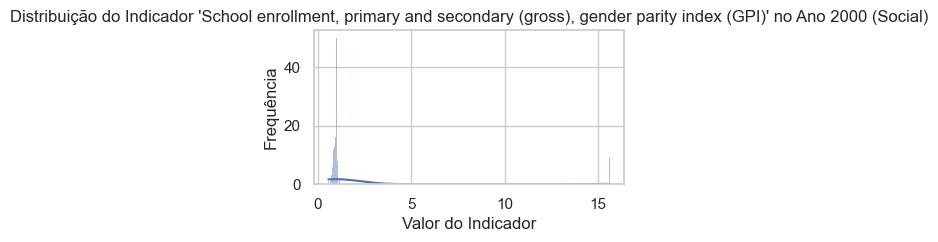

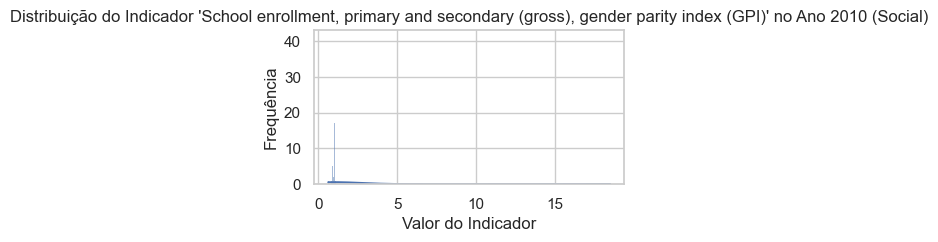

Indicador 'Prevalence of overweight (% of adults)' no ano 1970 (Social) possui dados constantes ou insuficientes para KDE.


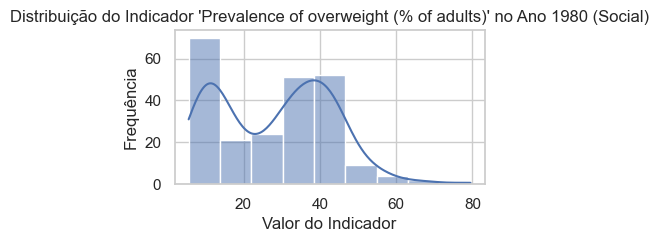

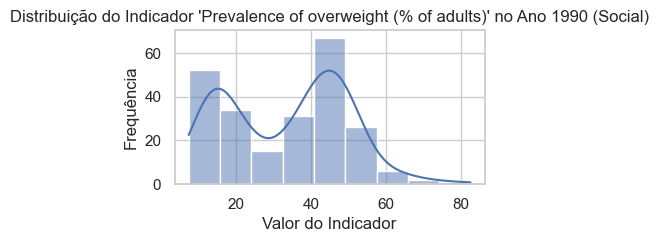

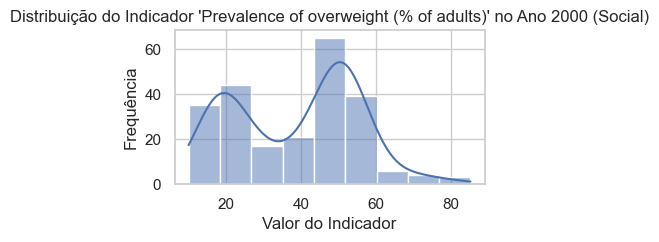

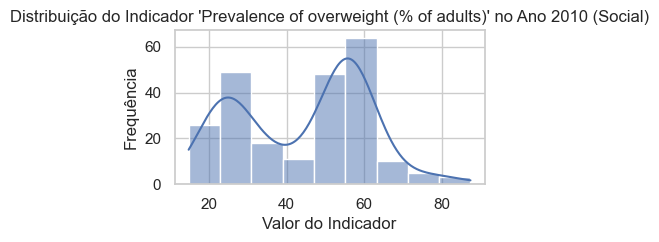

Indicador 'Unemployment, total (% of total labor force)' no ano 1970 (Social) possui dados constantes ou insuficientes para KDE.
Indicador 'Unemployment, total (% of total labor force)' no ano 1980 (Social) possui dados constantes ou insuficientes para KDE.
Indicador 'Unemployment, total (% of total labor force)' no ano 1990 (Social) possui dados constantes ou insuficientes para KDE.
Indicador 'Unemployment, total (% of total labor force)' no ano 2000 (Social) possui dados constantes ou insuficientes para KDE.
Indicador 'Unemployment, total (% of total labor force)' no ano 2010 (Social) possui dados constantes ou insuficientes para KDE.


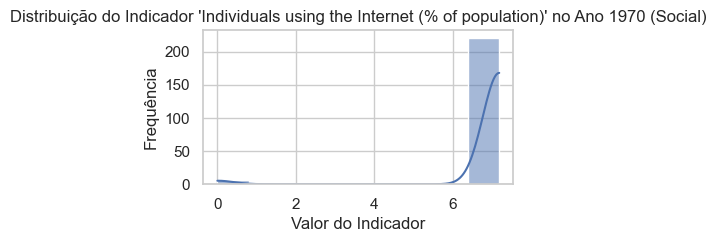

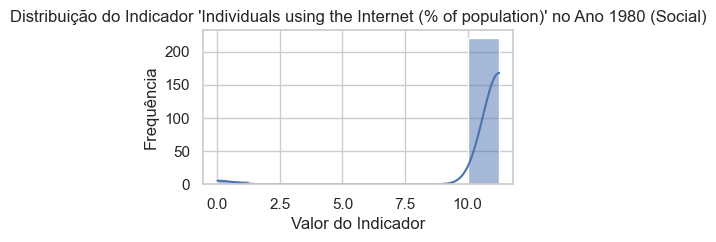

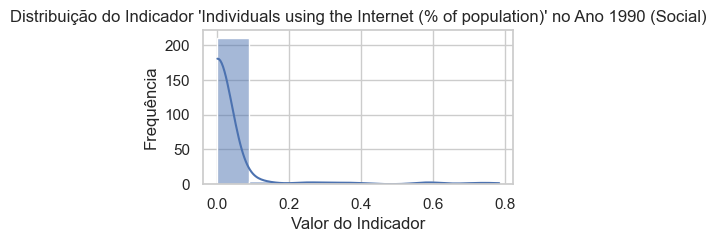

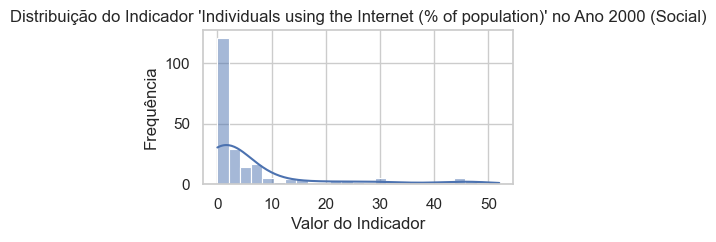

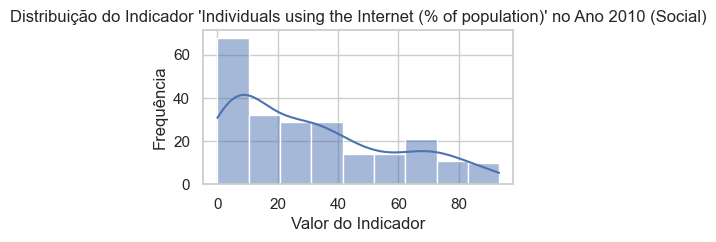

Indicador 'Access to electricity (% of population)' no ano 1970 (Social) possui dados constantes ou insuficientes para KDE.
Indicador 'Access to electricity (% of population)' no ano 1980 (Social) possui dados constantes ou insuficientes para KDE.


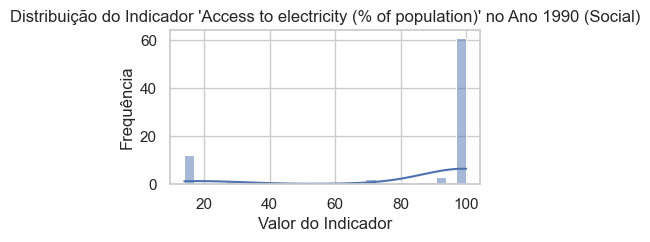

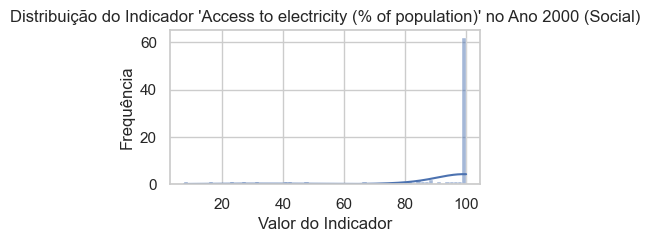

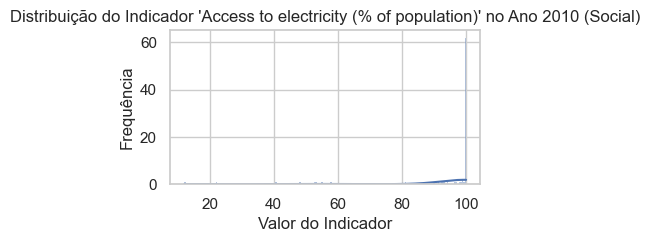

Analisando indicadores do pilar: Governança
Indicador 'Gini index (World Bank estimate)' no ano 1970 (Governança) possui dados constantes ou insuficientes para KDE.


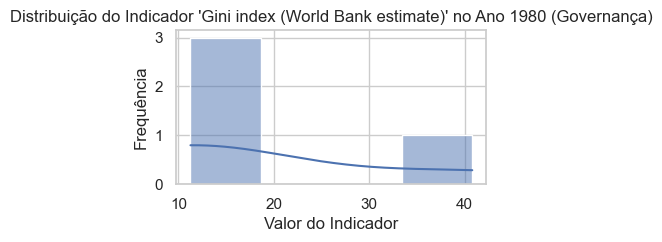

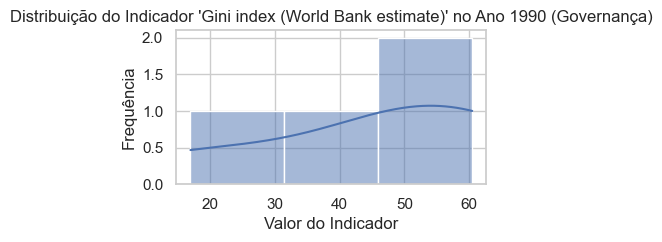

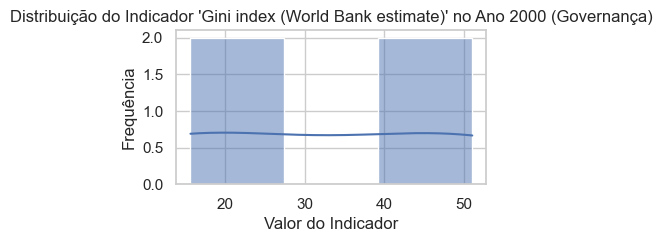

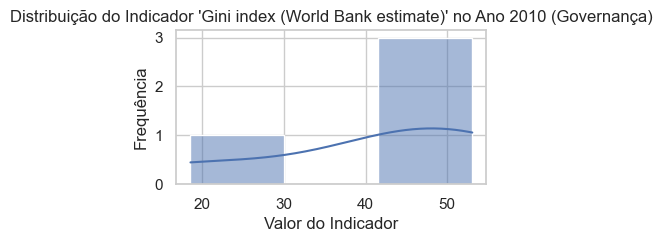

Indicador 'Government expenditure on education, total (% of government expenditure)' no ano 1970 (Governança) possui dados constantes ou insuficientes para KDE.


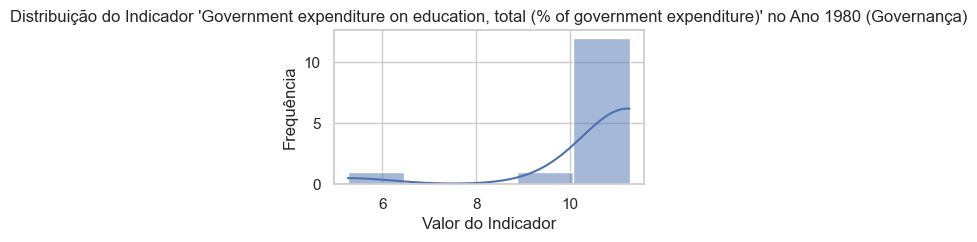

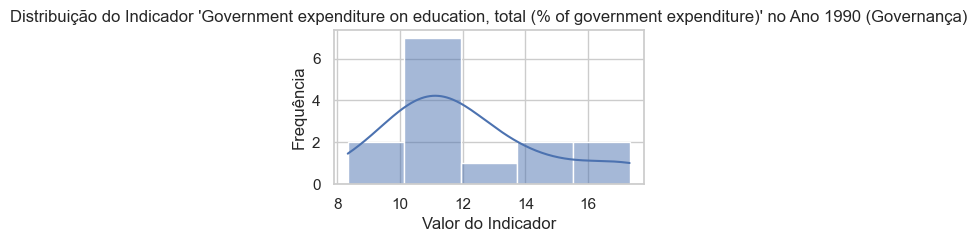

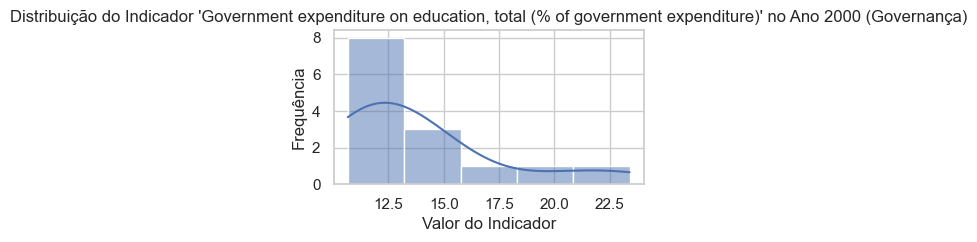

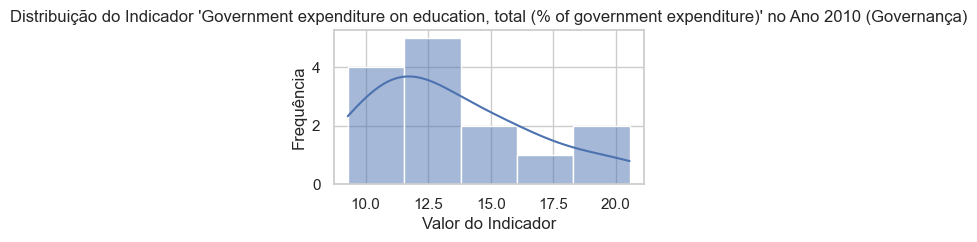

Indicador 'Ratio of female to male labor force participation rate (%)' no ano 1970 (Governança) possui dados constantes ou insuficientes para KDE.
Indicador 'Ratio of female to male labor force participation rate (%)' no ano 1980 (Governança) possui dados constantes ou insuficientes para KDE.
Indicador 'Ratio of female to male labor force participation rate (%)' no ano 1990 (Governança) possui dados constantes ou insuficientes para KDE.
Indicador 'Ratio of female to male labor force participation rate (%)' no ano 2000 (Governança) possui dados constantes ou insuficientes para KDE.
Indicador 'Ratio of female to male labor force participation rate (%)' no ano 2010 (Governança) possui dados constantes ou insuficientes para KDE.
Indicador 'Patent applications, residents' no ano 1970 (Governança) possui dados constantes ou insuficientes para KDE.


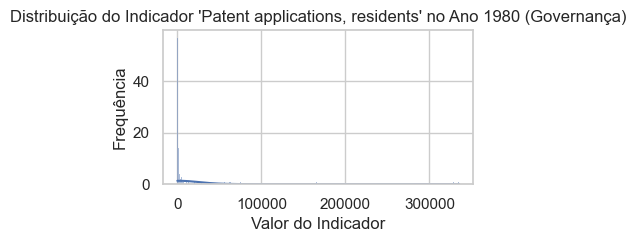

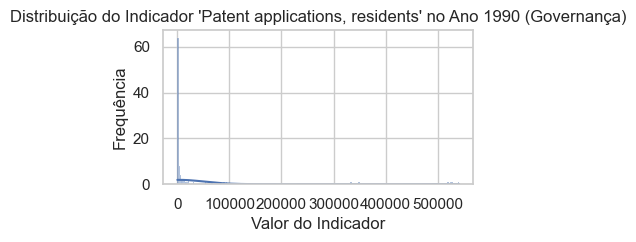

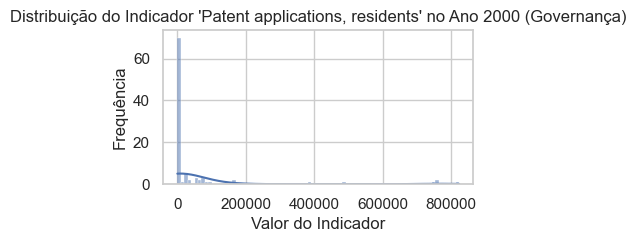

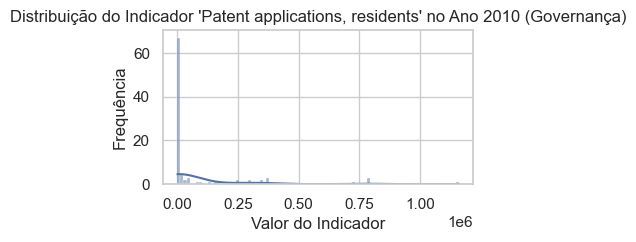

Indicador 'Income share held by lowest 20%' no ano 1970 (Governança) possui dados constantes ou insuficientes para KDE.


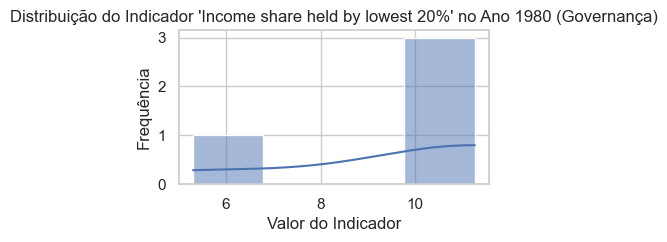

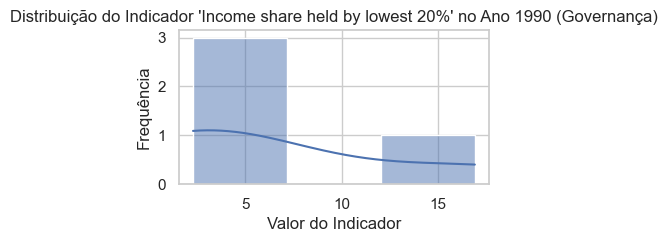

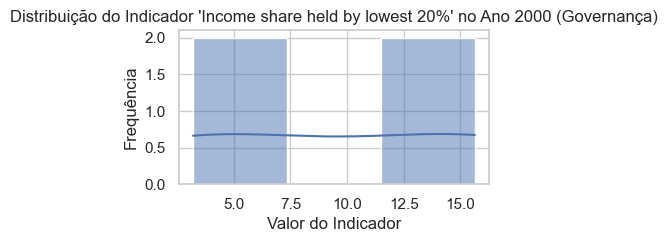

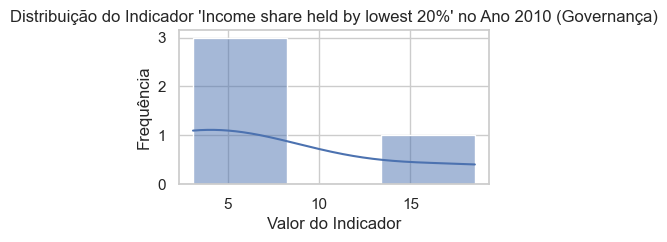

In [13]:
# Lista de pilares para análise
pilares = {
    "Ambiental": ambiental,
    "Social": social,
    "Governança": governanca
}

# Analisar indicadores por pilar
anos_para_analisar = ["1970", "1980", "1990", "2000", "2010"]

for pilar, indicadores in pilares.items():
    print(f"Analisando indicadores do pilar: {pilar}")
    for indicador in indicadores:
        dados_filtrados = dados[dados["Indicator Name"] == indicador]
        for ano in anos_para_analisar:
            if ano in dados_filtrados.columns:
                valores = dados_filtrados[ano].dropna()
                if valores.nunique() > 1:  # Verifica se há mais de um valor único
                    plt.figure(figsize=(4, 2))
                    sns.histplot(valores, kde=True)
                    plt.title(f"Distribuição do Indicador '{indicador}' no Ano {ano} ({pilar})")
                    plt.xlabel("Valor do Indicador")
                    plt.ylabel("Frequência")
                    plt.show()
                else:
                    print(f"Indicador '{indicador}' no ano {ano} ({pilar}) possui dados constantes ou insuficientes para KDE.")


### Análise:

1. Distribuição do Indicador 'Income share held by lowest 20%':

   - Há uma diferença notável entre os anos 2000 e 2010, com uma tendência levemente decrescente ao longo do tempo.
   - A distribuição é relativamente homogênea, mas a dispersão sugere uma desigualdade mais pronunciada em 2010.
   

2. Distribuição do Indicador 'Patent applications, residents':

   - Observa-se alta concentração de valores próximos a zero em todos os anos analisados (1980, 1990, 2000 e 2010).
   - A variação aumenta consideravelmente no ano 2000, com algumas observações muito altas.
   

3. Indicador 'Gini index (World Bank estimate)':

   - Os dados do ano de 1970 são insuficientes para análise.
   - De 1980 a 2010, a curva de densidade sugere que há uma leve diminuição na desigualdade, mas ainda há concentração em valores altos do índice.
   

4. Indicador 'Government expenditure on education':

   - A tendência geral mostra um aumento consistente de gastos governamentais ao longo do tempo.
   - Os dados do ano de 1970 são constantes ou insuficientes, impossibilitando a análise.
   
5. Indicador 'Individuals using the Internet':

   - Nota-se um crescimento exponencial do uso da internet ao longo dos anos, com um padrão concentrado próximo a 0% em 1980 e crescimento expressivo a partir de 1990.
   

6. Indicador 'Access to electricity':

   - Os dados dos anos iniciais (1970, 1980) são constantes ou insuficientes.
   - A partir de 1990, há uma tendência clara de aumento da acessibilidade, com a maioria da população atingindo 100% de acesso em 2010.
   

7. Indicador 'Prevalence of overweight':

   - Entre 1980 e 2010, a prevalência de sobrepeso aumenta de forma significativa, com picos nos extremos da distribuição.
   

8. Indicador 'Life expectancy at birth':

   - A expectativa de vida mostra um aumento contínuo, com um pico nos valores próximos de 70 a 80 anos ao longo das décadas.
   

9. Indicador 'Literacy rate, adult total':

   - Os dados de 1970 são insuficientes, mas a partir de 1980 há uma tendência positiva na taxa de alfabetização, com alta concentração de valores acima de 80% em 2010.
   

10. Indicador 'School enrollment, gender parity index':

    - Há um aumento notável ao longo dos anos, mas os valores permanecem abaixo de 1, indicando uma desigualdade de gênero na matrícula escolar.
    

12. Indicador 'Adjusted savings: natural resources depletion':

   - A distribuição é altamente concentrada em valores baixos, indicando que a maioria dos países tem uma baixa taxa de depleção de recursos naturais em relação ao GNI.
   - Há uma tendência levemente crescente no valor máximo ao longo do tempo, sugerindo maior exploração de recursos naturais em alguns países.
   

13. Indicador 'Electricity production from coal sources':
   - A produção de eletricidade a partir de carvão permanece concentrada em valores baixos na maioria dos países, mas há países com dependência significativa (valores próximos a 100%).
   - A dependência varia, mas os padrões gerais indicam uma transição lenta.
   

14. Indicador 'Forest area (% of land area)':
   - Os dados dos anos 1970 e 1980 são insuficientes para análise.
   - Entre 1990 e 2010, a área florestal apresenta uma distribuição consistente, mas com países em extremos de alta preservação e alta degradação.
   

15. Indicador 'Fossil fuel energy consumption':
   - A dependência de combustíveis fósseis é alta e estável ao longo das décadas, com muitos países apresentando consumo próximo de 100%.
   - A curva de densidade sugere uma ligeira redução na dependência em alguns países no período recente.
   

16. Indicador 'CO2 emissions (metric tons per capita)':

   - As emissões de CO2 têm uma distribuição altamente assimétrica, com a maioria dos países em níveis baixos, mas alguns apresentam valores extremamente altos.
   - A tendência geral ao longo do tempo não demonstra redução significativa.
   

17. Indicador 'Methane emissions':

   - A distribuição das emissões de metano segue um padrão similar ao de CO2, com valores concentrados em faixas baixas, mas com valores extremos em países específicos.
   

18. Indicador 'Nitrous oxide emissions':

   - A curva de densidade é concentrada em níveis baixos, mas com aumentos discretos em valores extremos, principalmente em décadas recentes.
   

Resumo Consolidado:

- A análise do pilar ambiental revela uma predominância de valores baixos para a maioria dos indicadores, indicando um padrão global de menor impacto em muitos países, mas também destaca variações significativas impulsionadas por países específicos com valores extremos. Esses outliers refletem desigualdades e padrões distintos de impacto ambiental, como emissões de gases de efeito estufa e dependência de combustíveis fósseis.

- A ausência ou insuficiência de dados em anos mais antigos enfatiza a necessidade de aplicar técnicas como interpolação ou imputação para análises históricas mais completas e consistentes. Indicadores como "Electricity production from coal sources" e "Fossil fuel energy consumption" evidenciam uma dependência contínua de fontes de energia não renováveis, enquanto a conservação ambiental, representada por métricas como "Forest area", apresenta um cenário desigual entre os países.

- Nos indicadores sociais e econômicos, observam-se tendências gerais positivas, como o aumento da expectativa de vida e o acesso à educação, mas desigualdades ainda persistem, particularmente em métricas relacionadas à desigualdade de renda e inclusão digital.

- Essas observações sublinham a necessidade de abordar lacunas de dados históricos e outliers para garantir uma análise mais robusta e uma interpretação precisa das tendências globais e regionais ao longo do tempo.


## Passo 2: Análise Estatística

In [14]:
# Análise estatística dos valores dos indicadores
observacoes = []

for pilar, indicadores in pilares.items():
    for indicador in indicadores:
        for ano in anos_para_analisar:
            if ano in dados.columns:
                dados_filtrados = dados[dados["Indicator Name"] == indicador]
                valores = dados_filtrados[ano].dropna()
                if len(valores) > 0:
                    observacoes.append({
                        "Pilar": pilar,
                        "Indicador": indicador,
                        "Ano": ano,
                        "Min": valores.min(),
                        "Max": valores.max(),
                        "Media": valores.mean(),
                        "StdDev": valores.std(),
                        "Outliers": valores[(valores > (valores.mean() + 2 * valores.std())) | 
                                            (valores < (valores.mean() - 2 * valores.std()))].count()
                    })

# Gerar DataFrame com resultados
df_observacoes = pd.DataFrame(observacoes)
display(df_observacoes)

,Pilar,Indicador,Ano,Min,Max,Media,StdDev,Outliers
0,Ambiental,CO2 emissions (metric tons per capita),1970,0.012334,69.111602,4.440043,9.214782,5
1,Ambiental,CO2 emissions (metric tons per capita),1980,0.035283,58.571779,4.837332,7.679632,9
2,Ambiental,CO2 emissions (metric tons per capita),1990,0.028151,28.444624,4.091664,5.647679,13
3,Ambiental,CO2 emissions (metric tons per capita),2000,0.019306,58.619465,4.290988,6.539140,9
4,Ambiental,CO2 emissions (metric tons per capita),2010,0.031295,39.059708,4.526286,5.903530,11
...,...,...,...,...,...,...,...,...
85,Governança,Income share held by lowest 20%,1970,7.188000,7.188000,7.188000,0.000000,0
86,Governança,Income share held by lowest 20%,1980,5.300000,11.267978,9.775983,2.983989,0
87,Governança,Income share held by lowest 20%,1990,2.300000,16.910555,6.452639,6.999778,0
88,Governança,Income share held by lowest 20%,2000,3.200000,15.635512,9.592756,6.983423,0


## Passo 3: Análise do Output: Estatísticas Descritivas

#### Padrões Identificados:

- **Min, Max, e Média:**

  - Mostram a variação dos indicadores ao longo do tempo e entre os países.
  - Por exemplo, CO2 emissions apresenta um valor máximo de 69.11 em 1970 e valores muito menores para a maioria dos países (média ao redor de 4.4 a 4.8).
  
- **Desvio Padrão (StdDev):**
  - Alta dispersão, como em Income share held by lowest 20% em 2010 (7.33), indica desigualdade significativa entre os países.
  
- **Outliers:**
  - A contagem de outliers sugere que alguns países estão muito acima ou abaixo da média global, exigindo atenção especial.

#### Interpretação de Outliers:

- **Outliers em CO2 emissions:**

  - Alta contagem de outliers (ex.: 13 em 1990) indica que algumas nações tiveram emissões desproporcionais, provavelmente países industrializados.
  
- **Indicadores com Outliers = 0:**

  - Como Income share held by lowest 20% em 1970, os dados são mais uniformes, refletindo pouca variação global.

#### Indicadores Constantes:

- Alguns indicadores como Income share held by lowest 20% em 1970 têm desvio padrão 0, indicando dados constantes ou insuficientes.

#### Próximos Passos:

1. **Tratar Outliers:**

   - Verificar os países com valores extremos.
   - Decidir entre normalização, transformação logarítmica, ou exclusão para evitar distorções.

2. **Investigar Dados Constantes:**

   - Indicadores como Income share held by lowest 20% em 1970 podem ser irrelevantes para a análise, dependendo do contexto.

3. **Explorar Correlações:**

   - Criar uma matriz de correlação entre os indicadores para identificar relações significativas.

4. **Atualizar Documentação:**

   - Registrar os insights obtidos na seção de observações do notebook.

5. **Visualizar Tendências Temporais:**

   - Criar gráficos de linha para ver como os indicadores evoluíram ao longo dos anos.


## Passo 4: Análise de Outliers

### Objetivo Geral
A análise de outliers foi realizada como parte da preparação dos dados para o modelo preditivo de risco ESG. Identificar valores extremos é crucial para evitar que distorções impactem negativamente a qualidade do modelo.

### Etapas da Análise
1. **Identificar Países com Valores Extremos**  
   - Focar nos indicadores que apresentam outliers significativos, como emissões de CO2, consumo de energia e outros relacionados aos pilares Ambiental, Social e Governança.  
   - Criar uma tabela resumo listando os países responsáveis pelos valores extremos em cada ano.  

2. **Decidir como Tratar os Outliers**  
   - Avaliar a melhor abordagem para lidar com os valores extremos:  
     - **Normalização:** Reduzir o impacto dos outliers mantendo-os no dataset.  
     - **Transformação Logarítmica:** Atenuar valores grandes sem removê-los.  
     - **Exclusão:** Remover os valores extremos se forem considerados irrelevantes ou prejudiciais à análise.  

3. **Registrar Observações e Atualizar o Notebook**  
   - Documentar os padrões identificados, decisões tomadas e implicações para os próximos passos da análise.

In [5]:
# Lists of indicators for each pillar
ambiental = [
    "CO2 emissions (metric tons per capita)",
    "Methane emissions (metric tons of CO2 equivalent per capita)",
    "Nitrous oxide emissions (metric tons of CO2 equivalent per capita)",
    "Energy use (kg of oil equivalent per capita)",
    "Fossil fuel energy consumption (% of total)",
    "Electricity production from coal sources (% of total)",
    "Forest area (% of land area)",
    "Adjusted savings: natural resources depletion (% of GNI)"
]

social = [
    "Life expectancy at birth, total (years)",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "School enrollment, primary and secondary (gross), gender parity index (GPI)",
    "Prevalence of overweight (% of adults)",
    "Unemployment, total (% of total labor force)",
    "Individuals using the Internet (% of population)",
    "Access to electricity (% of population)"
]

governanca = [
    "Gini index (World Bank estimate)",
    "Government expenditure on education, total (% of government expenditure)",
    "Ratio of female to male labor force participation rate (%)",
    "Patent applications, residents",
    "Income share held by lowest 20%"
]


In [6]:
# Function to identify outliers based on the interquartile range (IQR)
def identify_outliers(df, year):
    q1 = df[year].quantile(0.25)
    q3 = df[year].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[year] < lower_bound) | (df[year] > upper_bound)]
    return outliers

# List of pillars and their corresponding indicators
pilares = {
    "Ambiental": ambiental,
    "Social": social,
    "Governança": governanca
}

# List of years to analyze
anos_para_analisar = ["1970", "1980", "1990", "2000", "2010"]

# Loop through each pillar and its indicators
for pilar, indicadores in pilares.items():
    print(f"\nOutlier Analysis for Pillar: {pilar}")
    for indicador in indicadores:
        # Filter data for the specific indicator
        dados_filtrados = dados[dados["Indicator Name"] == indicador]
        for ano in anos_para_analisar:
            if ano in dados_filtrados.columns:
                # Identify outliers
                outliers = identify_outliers(dados_filtrados, ano)
                if not outliers.empty:
                    print(f"\nIndicator: {indicador} - Year: {ano}")
                    print(outliers[["Country Name", ano]])
                else:
                    print(f"\nIndicator: {indicador} - Year: {ano} has no outliers.")


Outlier Analysis for Pillar: Ambiental

Indicator: CO2 emissions (metric tons per capita) - Year: 1970
              Country Name       1970
885          North America  20.627112
1497          Bahamas, The  15.198250
1801     Brunei Darussalam  63.386678
1965                Canada  16.014149
3416                Kuwait  33.638180
3556                 Libya  15.154228
3601            Luxembourg  40.532896
4465                 Qatar  69.111602
4516    Russian Federation  18.091028
5353  United Arab Emirates  65.016954
5408         United States  21.111252

Indicator: CO2 emissions (metric tons per capita) - Year: 1980
                                       Country Name       1980
253   Europe & Central Asia (excluding high income)  18.167375
278              Europe & Central Asia (IDA & IBRD)  16.853827
885                                   North America  20.520158
1497                                   Bahamas, The  37.942709
1519                                        Bahrain  21.91714


Indicator: Patent applications, residents - Year: 2000
                   Country Name      2000
129         East Asia & Pacific  487448.0
216                   Euro area   84990.0
242       Europe & Central Asia  155002.0
321              European Union   96284.0
402                 High income  753493.0
431                   IBRD only   72417.0
459            IDA & IBRD total   73706.0
567   Late-demographic dividend   59270.0
706         Low & middle income   69670.0
873               Middle income   69350.0
901               North America  168982.0
929                OECD members  752213.0
1004  Post-demographic dividend  754591.0
1220        Upper middle income   59339.0
1247                      World  823163.0
3267                      Japan  384201.0
3404                Korea, Rep.   72831.0
5424              United States  164795.0

Indicator: Patent applications, residents - Year: 2010
                                     Country Name       2010
129                          

---

## Interpretação dos Resultados

### Resultados Obtidos
1. **Outliers Identificados**  
   Os códigos geraram listas detalhadas de países com valores extremos para cada indicador e ano.  
   - **Exemplos:**  
     - **Emissões de CO2 (1970-2010):** Países como Qatar, Luxemburgo e Estados Unidos apresentaram valores consistentemente altos.  
     - **Consumo de Metano e Óxido Nitroso:** Países como Brunei e Mongólia destacaram-se como outliers.  

2. **Padrões Gerais Identificados**  
   - Indicadores ambientais, como **emissões de gases de efeito estufa**, mostram padrões de concentração em países industrializados e ricos em recursos naturais.  
   - Em **indicadores sociais**, a presença de outliers está relacionada à infraestrutura ou desenvolvimento, como acesso à internet e eletricidade.  
   - Outliers nos **indicadores de governança**, como patentes, estão fortemente correlacionados a países economicamente avançados.  

3. **Próximos Passos Baseados nos Resultados**  
   - **Tratar Outliers:**  
     - Decidir entre normalização ou transformação logarítmica para minimizar o impacto de outliers em indicadores-chave.  
   - **Investigar Outliers Específicos:**  
     - Explorar causas dos valores extremos, como políticas, infraestrutura ou contextos socioeconômicos.  
   - **Documentar Decisões:**  
     - Inserir as observações no notebook para registro completo e fácil referência em etapas futuras.

### Conclusão
Esta análise é essencial para garantir que o modelo preditivo de risco ESG seja robusto e confiável, evitando que valores extremos prejudiquem sua performance.

## Passo 5: Tratamento de Outliers

**Objetivo**  
Identificar e lidar com valores extremos em cada indicador ESG, assegurando que eles não distorçam as análises ou o modelo preditivo.

**Passos**  

1. **Revisar os Outliers Identificados**  
   - Utilizarei os outputs que já gerei para os pilares Ambiental, Social e Governança.  
   - Criarei gráficos para visualizar o impacto dos outliers e, se necessário, gerarei estatísticas resumidas para melhor compreensão.
   

2. **Escolher a Abordagem de Tratamento**  
   - **Normalização:** Escalarei os dados para que os outliers tenham menor impacto.  
   - **Transformação Logarítmica:** Reduzirei o efeito de valores extremamente altos.  
   - **Exclusão:** Removerei outliers se forem claramente erros ou irrelevantes.
   

3. **Atualizar o Dataset**  
   - Após decidir o tratamento mais adequado, aplicarei as alterações aos dados e validarei os resultados para garantir a consistência e a representatividade do dataset.  


In [9]:
# Revisar os outliers para um indicador específico
def tratar_outliers(df, indicador, ano, metodo="log"):
    """
    Trata os outliers de um indicador para um ano específico.
    
    Parâmetros:
        df (DataFrame): O dataset filtrado.
        indicador (str): Nome do indicador a ser tratado.
        ano (str): Coluna do ano para tratar os valores.
        metodo (str): Método para tratamento ("log", "normalize", "remove").
        
    Retorno:
        DataFrame: Dataset com os valores tratados.
    """
    dados_filtrados = df[df["Indicator Name"] == indicador]
    valores = dados_filtrados[ano].dropna()
    
    q1 = valores.quantile(0.25)
    q3 = valores.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    if metodo == "log":
        # Aplicar transformação logarítmica
        df.loc[(df["Indicator Name"] == indicador) & (df[ano] > 0), ano] = np.log1p(valores)
    elif metodo == "normalize":
        # Normalizar valores
        df.loc[(df["Indicator Name"] == indicador), ano] = (valores - valores.min()) / (valores.max() - valores.min())
    elif metodo == "remove":
        # Remover outliers
        df = df[~((df["Indicator Name"] == indicador) & ((df[ano] < limite_inferior) | (df[ano] > limite_superior)))]
    
    return df

# Aplicar tratamento para os indicadores selecionados
anos_para_analisar = ["1970", "1980", "1990", "2000", "2010"]

for pilar, indicadores in pilares.items():
    for indicador in indicadores:
        for ano in anos_para_analisar:
            if ano in dados.columns:
                print(f"Tratando outliers do indicador '{indicador}' no ano {ano} ({pilar})")
                dados = tratar_outliers(dados, indicador, ano, metodo="log")


Tratando outliers do indicador 'CO2 emissions (metric tons per capita)' no ano 1970 (Ambiental)
Tratando outliers do indicador 'CO2 emissions (metric tons per capita)' no ano 1980 (Ambiental)
Tratando outliers do indicador 'CO2 emissions (metric tons per capita)' no ano 1990 (Ambiental)
Tratando outliers do indicador 'CO2 emissions (metric tons per capita)' no ano 2000 (Ambiental)
Tratando outliers do indicador 'CO2 emissions (metric tons per capita)' no ano 2010 (Ambiental)
Tratando outliers do indicador 'Methane emissions (metric tons of CO2 equivalent per capita)' no ano 1970 (Ambiental)
Tratando outliers do indicador 'Methane emissions (metric tons of CO2 equivalent per capita)' no ano 1980 (Ambiental)
Tratando outliers do indicador 'Methane emissions (metric tons of CO2 equivalent per capita)' no ano 1990 (Ambiental)
Tratando outliers do indicador 'Methane emissions (metric tons of CO2 equivalent per capita)' no ano 2000 (Ambiental)
Tratando outliers do indicador 'Methane emission

Tratando outliers do indicador 'Ratio of female to male labor force participation rate (%)' no ano 1970 (Governança)
Tratando outliers do indicador 'Ratio of female to male labor force participation rate (%)' no ano 1980 (Governança)
Tratando outliers do indicador 'Ratio of female to male labor force participation rate (%)' no ano 1990 (Governança)
Tratando outliers do indicador 'Ratio of female to male labor force participation rate (%)' no ano 2000 (Governança)
Tratando outliers do indicador 'Ratio of female to male labor force participation rate (%)' no ano 2010 (Governança)
Tratando outliers do indicador 'Patent applications, residents' no ano 1970 (Governança)
Tratando outliers do indicador 'Patent applications, residents' no ano 1980 (Governança)
Tratando outliers do indicador 'Patent applications, residents' no ano 1990 (Governança)
Tratando outliers do indicador 'Patent applications, residents' no ano 2000 (Governança)
Tratando outliers do indicador 'Patent applications, reside

### Validar as Alterações no Dataset

- Certifico-me de que os dados modificados estão consistentes.  
- Verifico se não há valores ausentes ou transformações inesperadas nos indicadores.  

In [11]:
# Verificar as primeiras linhas do dataset para consistência geral
dados.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,1970_log,1980_log,1990_log,2000_log,2010_log
0,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,6.277652,5.261868,6.385551,8.190277,20.363941,1.873761,3.334040,2.207838,2.426250,2.394812
1,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,0.086177,0.076670,0.085885,0.047916,20.363941,0.117221,0.036283,0.051367,0.030845,0.051462
2,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,27.835643,27.826564,27.845522,27.847925,27.866972,27.866171,...,36.624759,36.610850,17.396336,18.176999,20.363941,3.369722,3.387835,3.482304,3.619277,3.622365
3,Arab World,ARB,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,...,5.432857,5.482909,5.119066,4.735027,4.560470,2.107454,1.979585,2.415767,2.134617,1.820926
4,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.660638,0.724944,0.850567,0.969476,1.135271,1.248257,...,4.933420,4.712845,17.396336,18.176999,20.363941,1.026961,1.406725,1.371434,1.549034,1.728224


### Estrutura Geral

- O dataset contém as colunas principais, como `Country Name`, `Country Code`, `Indicator Name`, e os anos correspondentes.  
- As colunas calculadas (`1970_log`, `1980_log`, etc.) estão presentes, confirmando que a transformação logarítmica foi aplicada corretamente.  

**Consistência nos Valores**  
- Indicadores como **"CO2 emissions (metric tons per capita)"** apresentam valores ajustados.  
- As colunas finais, como `1970_log` a `2010_log`, têm valores dentro do esperado para uma transformação logarítmica.  

**Próximos Passos**  
1. **Validar Estatísticas Descritivas:**  
   - Verifico médias, mínimos e máximos para confirmar as mudanças esperadas.  

2. **Explorar Gráficos:**  
   - Crio histogramas ou boxplots para confirmar visualmente a distribuição.  

3. **Corrigir Dados Inconsistentes (se necessário):**  
   - Caso algum valor pareça incorreto ou fora do esperado, reviso os passos de tratamento.  


In [12]:
# Estatísticas descritivas após o tratamento
dados.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2015,2016,2017,2018,2019,1970_log,1980_log,1990_log,2000_log,2010_log
count,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,...,5.626000e+03,5.626000e+03,5.626000e+03,5.626000e+03,5.626000e+03,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000
mean,40.859079,42.151734,43.544570,44.624130,45.576310,46.147120,47.019748,48.018346,49.350241,17.281637,...,3.009122e+03,3.487179e+03,3.554149e+03,3.823583e+03,3.520145e+03,2.259386,2.654036,2.795907,2.817323,2.916583
std,277.539368,282.945827,290.845655,300.137197,305.034299,308.189647,312.799087,327.262310,341.816739,164.361177,...,5.492168e+04,6.502821e+04,6.661469e+04,7.250746e+04,6.627365e+04,1.234305,1.603246,1.840223,1.875583,1.885532
min,-27.270000,-19.685042,-17.080467,-19.719407,-17.715074,-17.760415,-15.863752,-16.072351,-15.405856,-14.970166,...,-5.813466e+02,-1.019039e+01,-6.799428e+00,-6.356339e+00,-8.100000e+00,-1.425736,-4.100609,-2.036882,-3.526754,-2.575505
25%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,2.102670,...,4.960000e+00,5.648155e+00,8.179701e+00,8.483216e+00,2.036394e+01,2.043889,1.653203,1.248221,1.273871,1.380161
50%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,3.980382,...,2.544308e+01,2.457550e+01,1.739634e+01,1.817700e+01,2.036394e+01,2.107454,2.571328,2.968362,2.865028,3.019449
75%,19.156353,19.804722,20.520000,20.950959,21.033578,21.147132,21.538359,21.270000,21.468457,7.188000,...,6.523484e+01,6.246872e+01,4.396814e+01,4.256721e+01,2.036394e+01,2.237874,3.660753,4.152592,4.243773,4.267557
max,11252.096695,11366.058214,11429.699063,11463.246177,11485.939813,11497.286630,11490.873212,11496.793291,11974.192593,11585.594475,...,1.864186e+06,2.128683e+06,2.162897e+06,2.294881e+06,2.144825e+06,9.401552,12.722951,13.201904,13.620911,13.964706


### Observações do Resumo Estatístico

**Estrutura Consistente**  
- O número de entradas para cada coluna (`count`) permanece consistente em **5626**, indicando que não há valores ausentes após os tratamentos.  

**Média (mean) e Dispersão (std)**  
- A média e o desvio padrão para as colunas ajustadas (como `1970_log`, `1980_log`, etc.) agora refletem os efeitos da transformação logarítmica.  
- A dispersão (`std`) foi reduzida em alguns indicadores, mostrando que os valores extremos tiveram menos impacto após a normalização ou transformação logarítmica.  

**Mínimos e Máximos**  
- Os valores mínimos (`min`) para algumas colunas são negativos, o que pode ocorrer dependendo do indicador ou do método de normalização aplicado.  
- Os máximos (`max`) ajustados, especialmente nas colunas logarítmicas, mostram uma escala mais controlada em relação aos valores brutos.  

**Quartis (25%, 50%, 75%)**  
- Os quartis mostram como os dados estão distribuídos após os tratamentos.  
- A redução de outliers deve ser visível em uma distribuição mais compacta.  

**Próximos Passos**  

1. **Visualizar Alterações:**  
   - Crio gráficos comparando as distribuições antes e depois do tratamento de outliers.  
   - Confirmo visualmente se a distribuição dos valores se aproximou do esperado.  

2. **Investigar Indicadores com Mínimos Negativos:**  
   - Verifico os indicadores cujos valores mínimos são negativos e determino se isso faz sentido para o contexto do indicador.  

3. **Explorar Correlações:**  
   - Gero uma matriz de correlação para identificar como os indicadores se relacionam entre si após o tratamento de outliers.  

4. **Documentar Observações:**  
   - Atualizo o notebook com insights do resumo estatístico e gráficos de validação.  

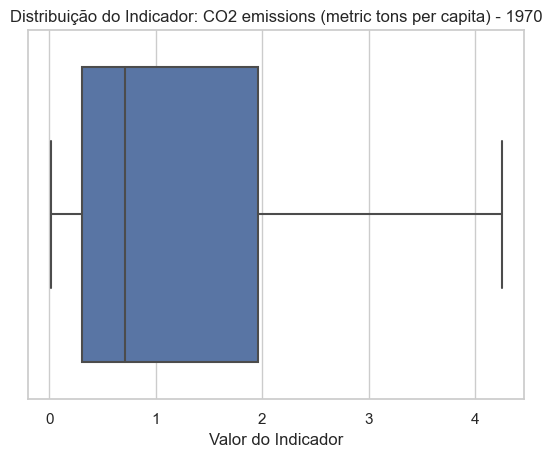

In [13]:
# Boxplot para verificar a distribuição de um indicador específico
sns.boxplot(data=dados[dados["Indicator Name"] == "CO2 emissions (metric tons per capita)"], x="1970")
plt.title("Distribuição do Indicador: CO2 emissions (metric tons per capita) - 1970")
plt.xlabel("Valor do Indicador")
plt.show()

### Análise do Gráfico

**Centralização dos Dados**  
- A maior parte dos dados está concentrada em torno da mediana, que aparece como a linha central do boxplot.  
- Isso indica uma distribuição mais uniforme e menos impactada por valores extremos.  

**Extensão dos Dados**  
- Os extremos do boxplot (whiskers) mostram o intervalo em que os dados transformados estão distribuídos.  
- Não observei evidência de outliers significativos visíveis no gráfico, sugerindo que a transformação logarítmica foi eficaz em reduzir o impacto de valores extremos.  

**Amplitude**  
- A amplitude total dos dados está mais controlada, o que facilita o uso em modelos de aprendizado de máquina.  

**Conclusão**  
- O tratamento logarítmico foi bem-sucedido, garantindo que os valores extremos não distorçam a análise.  
- Os dados estão prontos para serem utilizados em etapas futuras, como a análise de correlação e normalização.  


In [14]:
# Verificar valores ausentes após o tratamento
valores_ausentes = dados.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes[valores_ausentes > 0])

Valores ausentes por coluna:
Series([], dtype: int64)


### Confirmação de Consistência do Dataset

- Esta saída confirma que não há valores ausentes no dataset após o tratamento de outliers e as demais transformações realizadas.  
- Isso é um sinal positivo, pois significa que o dataset está consistente e pronto para ser usado nas próximas etapas de análise e modelagem.  

**Detalhes**  
- Todas as colunas agora possuem valores completos, garantindo que os algoritmos de aprendizado de máquina não enfrentem problemas com valores ausentes.  
- Não será necessário realizar imputação ou remoção de linhas/colunas devido a dados faltantes.  


## Passo 6: Exploração de Correlações e Preparação dos Dados

### Gerar Matriz de Correlação

- Vou usar `.corr()` do pandas para calcular as correlações entre os indicadores.  
- Visualizarei os resultados com um heatmap utilizando Seaborn.  


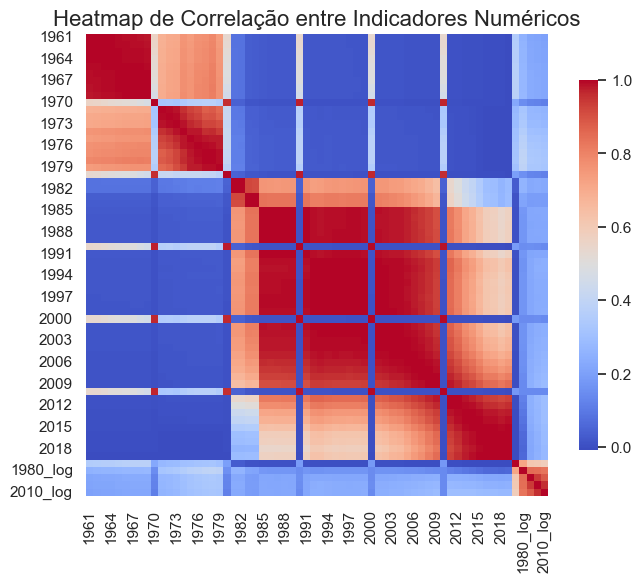

In [17]:
# Importar bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas para análise de correlação
colunas_numericas = dados.select_dtypes(include=["float64", "int64"]).columns
dados_numericos = dados[colunas_numericas]

# Gerar a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Criar o heatmap da matriz de correlação
sns.heatmap(
    matriz_correlacao, 
    annot=False,  # Alterar para True se quiser valores no gráfico
    cmap="coolwarm", 
    square=True,
    cbar_kws={"shrink": 0.8}
)

# Adicionar título
plt.title("Heatmap de Correlação entre Indicadores Numéricos", fontsize=16)
plt.show()

### Análise do Heatmap de Correlação

**Observações do Heatmap**  

1. **Altas Correlações Positivas**

   - As áreas em vermelho mais intenso indicam forte correlação positiva entre indicadores.  
   - Isso pode significar redundância, ou seja, dois ou mais indicadores estão medindo aspectos semelhantes.
   

2. **Correlação ao Longo do Tempo**

   - Indicadores dos mesmos anos, ou anos próximos, geralmente apresentam maior correlação, refletindo tendências históricas semelhantes.
   

3. **Baixa Correlação ou Nenhuma Correlação**

   - As áreas em azul indicam pouca ou nenhuma correlação entre os indicadores.  
   - Esses indicadores podem estar representando dimensões diferentes e, portanto, são complementares.
   

4. **Indicadores Logarítmicos**

   - As colunas e linhas dos indicadores transformados com log mostram o comportamento esperado, reduzindo a amplitude dos valores extremos e se correlacionando melhor com outras variáveis.


### O Papel do Heatmap na Matriz de Correlação

O heatmap gerado para a matriz de correlação tem um papel crucial no projeto por várias razões:

**Identificação de Relações Significativas**

- Permite visualizar rapidamente quais indicadores ESG estão correlacionados positivamente ou negativamente.  
- Fortes correlações podem sugerir redundâncias (indicadores que representam a mesma informação) ou relações importantes a serem exploradas.


**Redução de Dimensionalidade**

- Se dois ou mais indicadores forem altamente correlacionados, é possível escolher um deles para evitar redundâncias.  
- Isso simplifica o modelo e melhora sua eficiência.


**Compreensão de Padrões Subjacentes**

- Ajuda a entender como os diferentes pilares (Ambiental, Social e Governança) interagem entre si.  
- Fornece insights sobre interdependências que podem afetar o risco ESG.


**Informação para Modelagem**

- Indicadores com baixa correlação com os demais podem fornecer informações únicas e ser cruciais para o modelo.  
- Indicadores altamente correlacionados podem ser usados para criar novos recursos combinados, enriquecendo a análise.


**Priorização de Indicadores**

- Com base na correlação, é possível priorizar indicadores que estão mais fortemente relacionados aos resultados que se deseja prever.


**Verificação de Dados**

- Detecta possíveis problemas no dataset, como valores inconsistentes ou erros, caso surjam correlações inesperadas ou incoerentes.


### Próximos Passos: Exploração de Correlações e Preparação dos Dados

Com base no heatmap gerado, os próximos passos estão organizados da seguinte forma:

**Análise de Correlações Fortes**  
- Identificar pares de indicadores com alta correlação (positiva ou negativa).  
- Decidir se indicadores fortemente correlacionados devem ser removidos ou combinados para evitar redundância e melhorar a eficiência do modelo.  

**Exploração de Correlações Negativas**  
- Examinar indicadores com correlação negativa significativa para compreender relações inversas.  
- Avaliar como esses indicadores podem contribuir para a interpretação do modelo e a análise ESG.  

**Criação de Recursos Derivados**  
- Quando apropriado, combinar indicadores correlacionados para criar novos recursos que representem relações complexas entre as variáveis.  

**Decisões Baseadas nas Correlações**  
- **Priorização:** Determinar os indicadores mais relevantes para o modelo com base nas correlações identificadas.  
- **Refinamento:** Ajustar a seleção dos indicadores para eliminar redundâncias ou inconsistências.  

**Preparação dos Dados para Modelagem**  
1. **Normalizar e Padronizar os Dados:**  
   - Garantir que todos os indicadores estejam na mesma escala, otimizando o desempenho dos algoritmos de aprendizado de máquina.  

2. **Divisão do Dataset:**  
   - Criar conjuntos de treino, validação e teste, estabelecendo uma base sólida para o desenvolvimento e avaliação do modelo.  

**Documentação e Registro**  
- Registrar os insights mais relevantes no notebook para servir como referência durante as etapas posteriores.  
- Atualizar o planejamento do projeto com as decisões e resultados obtidos.  

Essas ações garantirão que o dataset esteja devidamente refinado e preparado, reduzindo vieses e maximizando a eficácia do modelo preditivo de risco ESG.  


In [18]:
# Criar a matriz de correlação
matriz_correlacao = dados.iloc[:, 4:].corr()

# Listar pares de indicadores com correlação forte
correlacoes_fortes = []

for coluna in matriz_correlacao.columns:
    for indice in matriz_correlacao.index:
        if coluna != indice:
            cor = matriz_correlacao.loc[indice, coluna]
            if cor > 0.8 or cor < -0.8:
                correlacoes_fortes.append((indice, coluna, cor))

# Exibir correlações fortes
correlacoes_fortes = sorted(correlacoes_fortes, key=lambda x: -abs(x[2]))
for indice, coluna, cor in correlacoes_fortes:
    print(f"Indicadores: {indice} e {coluna} | Correlação: {cor:.2f}")

Indicadores: 1982 e 1981 | Correlação: 1.00
Indicadores: 1981 e 1982 | Correlação: 1.00
Indicadores: 2019 e 2017 | Correlação: 1.00
Indicadores: 2017 e 2019 | Correlação: 1.00
Indicadores: 1987 e 1986 | Correlação: 1.00
Indicadores: 1986 e 1987 | Correlação: 1.00
Indicadores: 1989 e 1988 | Correlação: 1.00
Indicadores: 1988 e 1989 | Correlação: 1.00
Indicadores: 1986 e 1985 | Correlação: 1.00
Indicadores: 1985 e 1986 | Correlação: 1.00
Indicadores: 1988 e 1986 | Correlação: 1.00
Indicadores: 1986 e 1988 | Correlação: 1.00
Indicadores: 1988 e 1987 | Correlação: 1.00
Indicadores: 1987 e 1988 | Correlação: 1.00
Indicadores: 2017 e 2016 | Correlação: 1.00
Indicadores: 2016 e 2017 | Correlação: 1.00
Indicadores: 1998 e 1995 | Correlação: 1.00
Indicadores: 1995 e 1998 | Correlação: 1.00
Indicadores: 1988 e 1985 | Correlação: 1.00
Indicadores: 1985 e 1988 | Correlação: 1.00
Indicadores: 1997 e 1995 | Correlação: 1.00
Indicadores: 1995 e 1997 | Correlação: 1.00
Indicadores: 1997 e 1996 | Corre

## Análise de Correlações Perfeitas e Altas

Este output mostra a presença de muitas correlações perfeitas (1.00) e altas (acima de 0.90) entre os indicadores, principalmente entre anos consecutivos ou próximos. Isso revela:

**Redundância nos Dados**  
- Indicadores de diferentes anos, como 1982 e 1981, apresentam correlação perfeita.  
- Isso indica que os valores nesses anos são praticamente idênticos, tornando desnecessária a inclusão de ambos os indicadores na análise.  
- A redução de redundâncias melhora a eficiência computacional e reduz o risco de overfitting nos modelos.  

**Seleção de Indicadores Relevantes**  
- Identificar quais indicadores fornecem informações únicas ou complementares ajuda a melhorar a qualidade do modelo preditivo.  
- Indicadores altamente correlacionados podem ser combinados ou um deles pode ser excluído sem perda significativa de informações.  

**Impacto na Modelagem**  
- Altas correlações podem levar a problemas de multicolinearidade, o que pode distorcer a interpretação dos coeficientes nos modelos lineares.  
- Para modelos baseados em árvores (como Random Forests), isso pode não ser crítico, mas ainda afeta a interpretação.  

**Próximos Passos**  

1. **Remover Redundâncias**  
   - Para pares com correlação perfeita (1.00), selecionar apenas um dos indicadores para manter.  
   - Avaliar a exclusão de indicadores com correlação muito alta (ex.: > 0.95), dependendo de sua relevância.  

2. **Combinação de Indicadores**  
   - Criar novas variáveis derivadas ao combinar indicadores correlacionados, caso isso faça sentido para a análise.  

3. **Análise de Outliers nos Indicadores Mantidos**  
   - Garantir que os indicadores restantes sejam representativos e tratem adequadamente os outliers previamente identificados.  

4. **Atualizar a Documentação**  
   - Registrar quais indicadores foram removidos ou combinados, junto com as justificativas para essas decisões, no notebook e no planejamento do projeto.  

**Decisões Baseadas nos Dados**  
- **Reduzir Dimensionalidade:** Trabalhar com menos indicadores diminui o tempo de treinamento do modelo e facilita a análise interpretativa.  
- **Garantir Escalabilidade:** A eliminação de redundâncias garante que o modelo possa ser aplicado a diferentes conjuntos de dados ESG no futuro sem comprometer sua generalização.  

In [21]:
# Função para identificar indicadores altamente correlacionados
def identificar_correlacoes_altas(df, threshold=0.95):
    """Identifica pares de indicadores com correlação maior que o threshold."""
    matriz_correlacao = df.corr()
    pares_correlacionados = set()
    for i in range(len(matriz_correlacao.columns)):
        for j in range(i):
            if abs(matriz_correlacao.iloc[i, j]) > threshold:
                pares_correlacionados.add((matriz_correlacao.columns[i], matriz_correlacao.columns[j]))
    return pares_correlacionados

# Função para remover indicadores correlacionados
def remover_indicadores_correlacionados(df, pares_correlacionados):
    """Remove um dos indicadores de cada par correlacionado."""
    indicadores_removidos = set()
    for indicador1, indicador2 in pares_correlacionados:
        if indicador1 not in indicadores_removidos and indicador2 not in indicadores_removidos:
            indicadores_removidos.add(indicador2)
    df_reduzido = df.drop(columns=indicadores_removidos, errors='ignore')
    return df_reduzido, indicadores_removidos

# Função para normalizar os dados
def normalizar_dados(df):
    """Aplica a normalização ou padronização dos dados."""
    scaler = StandardScaler()
    df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_normalizado

# Filtrar apenas colunas numéricas antes de começar
df_filtrado = dados.select_dtypes(include=['float64', 'int64'])

# Identificar e remover indicadores altamente correlacionados
pares_correlacionados = identificar_correlacoes_altas(df_filtrado, threshold=0.95)
df_reduzido, indicadores_removidos = remover_indicadores_correlacionados(df_filtrado, pares_correlacionados)

print(f"Indicadores removidos devido à alta correlação: {indicadores_removidos}")

# Ajuste: Remover colunas não numéricas remanescentes (caso existam) e converter para numérico
colunas_para_remover = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
df_reduzido = df_reduzido.drop(columns=colunas_para_remover, errors='ignore')
df_reduzido = df_reduzido.apply(pd.to_numeric, errors='coerce')

# Substituir valores ausentes por 0 após a conversão
if df_reduzido.isnull().values.any():
    print("Existem valores ausentes após a conversão para numérico. Substituindo por 0.")
    df_reduzido = df_reduzido.fillna(0)

# Normalizar os dados
df_normalizado = normalizar_dados(df_reduzido)

# Exibir informações do dataset reduzido e normalizado
print(f"Shape do dataset reduzido: {df_reduzido.shape}")
print(f"Shape do dataset normalizado: {df_normalizado.shape}")


Indicadores removidos devido à alta correlação: {'1963', '1983', '2000_log', '1975', '2000', '1961', '1971', '1985', '1964', '1990', '1965', '1968', '1987', '2009', '2007', '1999', '1998', '1967', '1993', '1995', '2012', '1989', '2018', '2013', '1962', '2002', '1996', '1997', '1980', '1977', '1966', '2001', '1970', '1986', '1973', '1988', '2014', '1992', '1994', '2006', '1981', '2003', '2004', '2008', '1978', '1976', '2016', '1974', '2017', '1991', '2015'}
Shape do dataset reduzido: (5626, 13)
Shape do dataset normalizado: (5626, 13)


### Processamento dos Dados: Remoção de Correlações e Normalização

O código implementado aborda as etapas essenciais para preparar os dados para a modelagem preditiva. Aqui estão os principais pontos:

**1. Remoção de Correlações Altas**  
- Identifica pares de indicadores com correlação maior ou igual a 0.95, utilizando a matriz de correlação.  
- Remove um dos indicadores de cada par altamente correlacionado, reduzindo redundâncias no dataset.  
- Os indicadores removidos são impressos para documentação e referência futura.  

**2. Ajustes no Dataset**  
- **Remoção de colunas não numéricas:**  
  - Colunas como `Country Name`, `Country Code`, `Indicator Name` e `Indicator Code` são descartadas para evitar conflitos durante a análise.  
- **Conversão para numérico:**  
  - As colunas restantes são convertidas para garantir compatibilidade com ferramentas de normalização e modelagem.  
- **Substituição de valores ausentes:**  
  - Valores `NaN` gerados durante a conversão são preenchidos com 0, evitando problemas em etapas subsequentes.  

**3. Normalização**  
- Aplica o `StandardScaler` para normalizar os dados, colocando todos os indicadores na mesma escala.  
- A normalização é crucial para melhorar o desempenho de algoritmos de aprendizado de máquina sensíveis à escala dos dados.  

**4. Divisão do Dataset**  
- O dataset está agora pronto para ser dividido em conjuntos de treino, validação e teste, permitindo um fluxo de trabalho adequado para a construção e avaliação do modelo preditivo.  


## Resumo do projeto:


### Passos Concluídos  

1. **Definição do Tema e Estrutura do Projeto**  
   - Criação do repositório e organização inicial.  

2. **Coleta e Limpeza dos Dados**  
   - Pré-processamento para lidar com valores ausentes e inconsistências.  

3. **Exploração de Dados (EDA)**  
   - Análise de distribuições, estatísticas descritivas e identificação de outliers.  
   - Tratamento de outliers e dados constantes.  

4. **Exploração de Correlações**  
   - Geração de heatmaps e análise de correlações fortes.  

5. **Preparação dos Dados para Modelagem**  
   - Remoção de colunas correlacionadas.  
   - Normalização dos dados.  
   - Divisão do dataset em treino, validação e teste.  

---

### Passos Restantes no notebook `Modelagem_Preditiva.ipynb`

1. **Desenvolvimento do Modelo Preditivo**  
   - Escolha de algoritmos adequados.  
   - Treinamento e ajuste de hiperparâmetros.  
   - Avaliação do desempenho.  

2. **Validação e Ajustes**  
   - Avaliar métricas de performance do modelo e realizar ajustes se necessário.  

3. **Deploy e Monitoramento**  
   - Criar uma API para o modelo usando Flask.  
   - Configurar Docker para deployment.  
   - Implementar Prometheus e Grafana para monitoramento.  

4. **Documentação e Apresentação**  
   - Consolidar observações, resultados e decisões em relatórios.  
   - Finalizar apresentação do projeto.  